In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from matplotlib.ticker import FixedLocator

In [2]:
df = pd.read_csv('/Users/hoyuenwa/Documents/Python Projects/HK_stranding/data/stranding_df_v241004.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
def generate_records(df):
    records = []
    for index, row in df.iterrows():
        year = row['Year']
        for species in df.columns[1:]:  
            count = row[species]
            if not pd.isna(count):  
                for _ in range(int(count)):  
                    date_str = f"{int(year)}-01-01"  
                    records.append((date_str, species))  
    records_df = pd.DataFrame(records, columns=['Date', 'Species'])
    return records_df

historic_df = pd.read_csv('/Users/hoyuenwa/Documents/Python Projects/HK_stranding/data/historic_record.csv')
historic_df = historic_df.replace(r'\*', '', regex=True)
historic_df = historic_df.apply(pd.to_numeric, errors='ignore')

historic_record_df = generate_records(historic_df)
historic_record_df['Ref'] = 'Parsons (1995)'
historic_record_df['Date'] = pd.to_datetime(historic_record_df['Date'])

In [4]:
df = pd.concat([df, historic_record_df])

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df['Length'] = pd.to_numeric(df['Length'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

df['Species_Category'] = df['Species']
df['Species_Category'] = df['Species_Category'].where(df['Species'].isin(['Sousa chinensis', 'Neophocaena phocaenoides']), 'Others')

df['Gender_Category'] = df['Sex'].map({'F': 'F', 'M': 'M', 'M?':'M', 'F?':'F'}).fillna('Un')

# Mapping of species to their corresponding family
family_mapping = {
    'Balaenoptera edeni': 'Balaenopteridae',
    'Balaenoptera omurai': 'Balaenopteridae',
    # 'Balaenoptera spp.': 'Balaenopteridae',
    'Delphinus delphis': 'Delphinidae',
    'Grampus griseus': 'Delphinidae',
    'Globicephala macrorhynchus': 'Delphinidae',
    'Lagenodelphis hosei': 'Delphinidae',
    'Pseudorca crassidens': 'Delphinidae',
    'Sousa chinensis': 'Delphinidae',
    'Stenella attenuata': 'Delphinidae',
    'Stenella coeruleoalba': 'Delphinidae',
    'Stenella longirostris': 'Delphinidae',
    'Steno bredanensis': 'Delphinidae',
    'Tursiops spp.': 'Delphinidae',
    'Tursiops aduncus': 'Delphinidae',
    'Tursiops truncatus': 'Delphinidae',
    'Kogia breviceps': 'Kogiidae',
    'Kogia sima': 'Kogiidae',
    # 'Kogia spp.': 'Kogiidae',
    'Neophocaena asiaeorientalis': 'Phocoenidae',
    'Neophocaena phocaenoides': 'Phocoenidae',
    'Physeter macrocephalus': 'Physeteridae',
    'Ziphius cavirostris': 'Ziphiidae'
}
df['Family'] = df['Species'].map(family_mapping).fillna('Unidentified')

age_group_mapping = {'Neonate/Calf': 'Calf', 'Juvenile/Sub-adult': 'Juvenile', 'CD':'Unknown', 'Sub-adult':'Subadult',
                     'Adult?':'Adult', 'Calf?':'Calf', 'Immature':'Juvenile', 'Immature?':'Juvenile',
                     'Subadult?':'Juvenile', 'Non-calf':'Adult', '---':'Unknown', 'Neonate?':'Neonate',
                     'Juvenile?':'Juvenile', '?':'Unknown'}

species_order = ['Unidentified species', 
    'Ziphius cavirostris', 'Physeter macrocephalus', 
       'Neophocaena phocaenoides', 'Neophocaena asiaeorientalis', 'Kogia spp.',
        'Kogia sima', 'Kogia breviceps', 
       'Tursiops spp.', 'Tursiops truncatus', 'Tursiops aduncus',
       'Steno bredanensis', 'Stenella longirostris',
       'Stenella coeruleoalba', 'Stenella attenuata',
       'Sousa chinensis', 'Pseudorca crassidens', #'Lagenodelphis hosei',
       'Globicephala macrorhynchus', 'Grampus griseus','Delphinus delphis', 'Balaenoptera spp.',
       'Balaenoptera omurai', 'Balaenoptera edeni']

species_color_palette = {
    'Sousa chinensis': 'crimson',
    'Neophocaena phocaenoides': 'navy',
    'Others': 'darkgrey'
}

marker_list = {
    'Sousa chinensis': 'o',
    'Neophocaena phocaenoides': 'D',
    'Others': 's'
}

family_color_palette = {
    'Delphinidae': 'crimson',
    'Phocoenidae': 'navy',
    'Balaenopteridae': '#254b70',
    'Kogiidae': '#2ecc71',
    'Physeteridae': '#9b59b6',
    'Ziphiidae': 'navy',
    'Unidentified':'darkgrey'
}

species_patterns = {
    'Sousa chinensis': '/',
    'Neophocaena phocaenoides': '/'
}

df['AgeGroup_Category'] = df['AgeClass'].replace(age_group_mapping)

In [6]:
df.shape

(1004, 24)

In [7]:
df.groupby(['Species']).size().reset_index(name='Count')

,Species,Count
0,Balaenoptera edeni,2
1,Balaenoptera omurai,1
2,Balaenoptera spp.,6
3,Delphinius capensis,1
4,Delphinus capensis,2
5,Delphinus delphis,6
6,Globicephala macrorhynchus,1
7,Grampus griseus,7
8,Kogia breviceps,5
9,Kogia sima,4


In [8]:
print('No. of cases since 2006-01-01:', df[df['Date']>pd.to_datetime('2006-01-01')].shape[0])
count_df = df[df['Date']>pd.to_datetime('2006-01-01')].groupby(['Species']).size().reset_index(name='Count')

count_df['percentage'] = (count_df['Count'] / count_df['Count'].sum(axis=0) * 100).round(3)
count_df.sort_values('Count', ascending=False)

No. of cases since 2006-01-01: 642


,Species,Count,percentage
7,Neophocaena phocaenoides,455,70.872
9,Sousa chinensis,142,22.118
13,Tursiops aduncus,8,1.246
16,Unidentified species,5,0.779
14,Tursiops spp.,4,0.623
2,Delphinus delphis,4,0.623
10,Stenella attenuata,4,0.623
15,Tursiops truncatus,3,0.467
11,Stenella coeruleoalba,3,0.467
4,Kogia breviceps,2,0.312


In [9]:
print('No. of all cases:', df.shape[0])
count_df = df.groupby(['Species']).size().reset_index(name='Count')
count_df['percentage'] = (count_df['Count'] / count_df['Count'].sum(axis=0) * 100).round(3)
count_df.sort_values('Count', ascending=False)

No. of all cases: 1004


,Species,Count,percentage
12,Neophocaena phocaenoides,617,61.454
15,Sousa chinensis,279,27.789
22,Tursiops truncatus,13,1.295
17,Stenella coeruleoalba,11,1.096
20,Tursiops aduncus,9,0.896
23,Unidentified species,8,0.797
16,Stenella attenuata,7,0.697
21,Tursiops spp.,7,0.697
7,Grampus griseus,7,0.697
2,Balaenoptera spp.,6,0.598


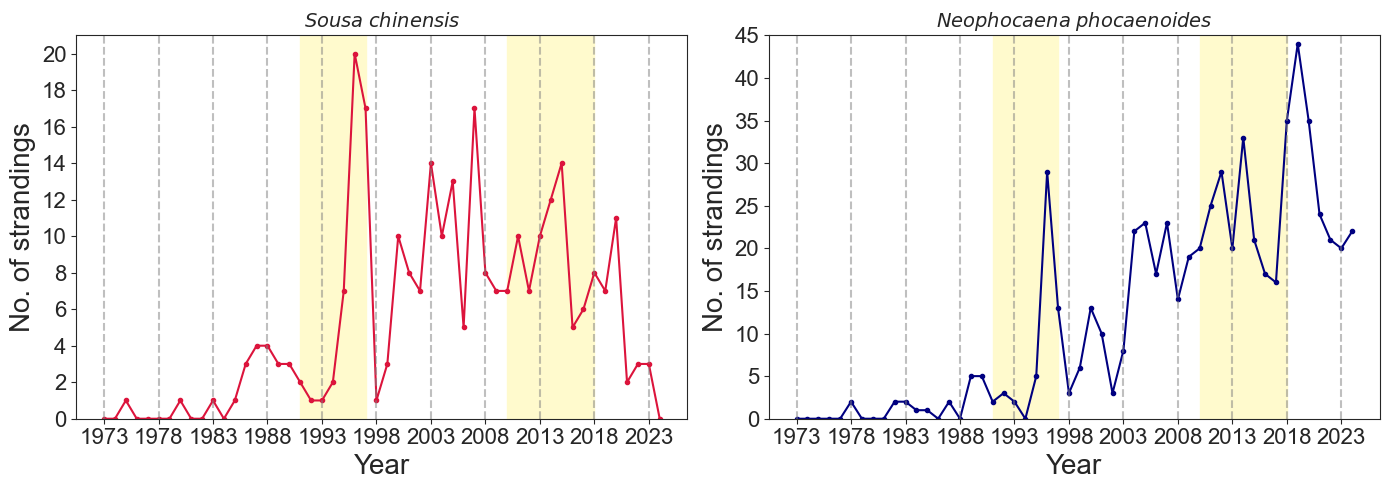

In [20]:
species_count_df = df[['Species', 'Year', 'Date']].groupby(['Species', 'Year']).count().reset_index()
species_count_df.columns = ['Species', 'Year', 'Count']

sns.set_style('white')
plt.figure(figsize=(14, 5)) 

# Sousa chinensis
plt.subplot(1, 2, 1)
count_df = species_count_df[species_count_df['Species']=='Sousa chinensis']
count_df = count_df.set_index('Year').reindex(range(1973, 2025), fill_value=0).reset_index()
count_df['Species'] = count_df['Species'].replace(0, 'Sousa chinensis')

count_df.plot(x='Year', y='Count', marker='.', color='crimson', ax=plt.gca(), legend=None)
plt.title('$Sousa$ $chinensis$', fontsize=14)
plt.xlabel('Year', fontsize=20)
plt.ylabel('No. of strandings', fontsize=20)
plt.xticks(ticks=np.arange(1973, 2024+1, 5), rotation=0, fontsize=16)
plt.yticks(ticks=np.arange(0, 22, 2), rotation=0, fontsize=16)
for year in range (1973, 2028, 5):
    plt.vlines(year, 0, 46, linestyles='--', color='grey', alpha=0.5) 
plt.fill_between(x=(1991, 1997), y1=-1, y2=22, color='lemonchiffon')
plt.fill_between(x=(2010, 2018), y1=-1, y2=22, color='lemonchiffon')
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.ylim(0, 21)

# Neophocaena phocaenoides
plt.subplot(1, 2, 2) 
count_df = species_count_df[species_count_df['Species']=='Neophocaena phocaenoides']
count_df = count_df.set_index('Year').reindex(range(1973, 2025), fill_value=0).reset_index()
count_df['Species'] = count_df['Species'].replace(0, 'Neophocaena phocaenoides')

count_df.plot(x='Year', y='Count', marker='.', color='navy', ax=plt.gca(), legend=None)
plt.title('$Neophocaena$ $phocaenoides$', fontsize=14)
plt.xlabel('Year', fontsize=20)
plt.ylabel('No. of strandings', fontsize=20)
plt.xticks(ticks=np.arange(1973, 2024+1, 5), rotation=0, fontsize=16)
plt.yticks(ticks=np.arange(0, 46, 5), rotation=0, fontsize=16)
for year in range (1973, 2028, 5):
    plt.vlines(year, 0, 46, linestyles='--', color='grey', alpha=0.5) 
plt.ylim(0, 45)
plt.fill_between(x=(1991, 1997), y1=-1, y2=45, color='lemonchiffon')
plt.fill_between(x=(2010, 2018), y1=-1, y2=45, color='lemonchiffon')
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.tight_layout()
plt.show()

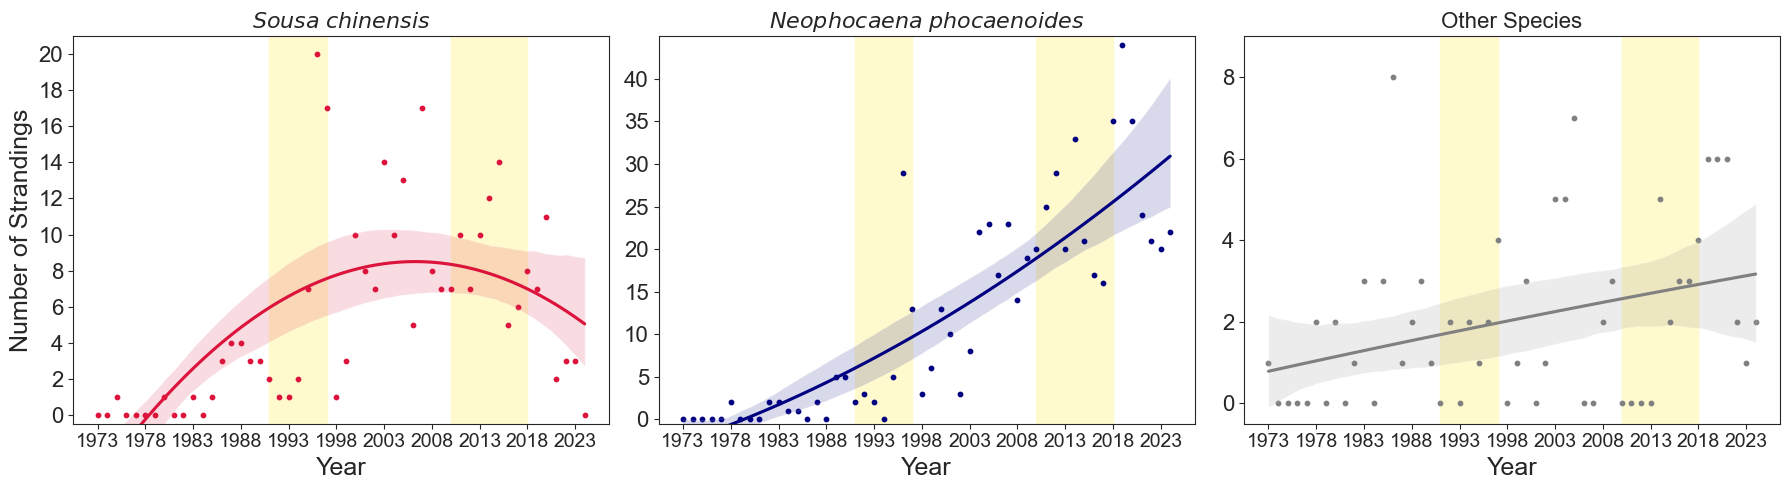

In [21]:
sns.set_style('white')
plt.figure(figsize=(18, 5)) 

# Sousa chinensis
plt.subplot(1, 3, 1)
count_df = species_count_df[species_count_df['Species']=='Sousa chinensis']
count_df = count_df.set_index('Year').reindex(range(1973, 2025), fill_value=0).reset_index()
count_df['Species'] = count_df['Species'].replace(0, 'Sousa chinensis')

sns.regplot(x='Year', y='Count', data=count_df, marker='o', scatter_kws={'s':10}, x_estimator=np.mean, order=2, color='crimson', ax=plt.gca())
plt.title('$Sousa$ $chinensis$', fontsize=16)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Strandings', fontsize=18)
plt.xticks(ticks=np.arange(1973, 2024+1, 5), rotation=0, fontsize=14)
plt.yticks(ticks=np.arange(0, count_df['Count'].max() + 1, 2), fontsize=16)
plt.ylim(-0.5, count_df['Count'].max() + 1)
plt.fill_between(x=(1991, 1997), y1=-1, y2=45, color='lemonchiffon', zorder=0)
plt.fill_between(x=(2010, 2018), y1=-1, y2=45, color='lemonchiffon', zorder=0)
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# # Neophocaena phocaenoides
plt.subplot(1, 3, 2)
count_df = species_count_df[species_count_df['Species']=='Neophocaena phocaenoides']
count_df = count_df.set_index('Year').reindex(range(1973, 2025), fill_value=0).reset_index()
count_df['Species'] = count_df['Species'].replace(0, 'Neophocaena phocaenoides')

sns.regplot(x='Year', y='Count', data=count_df, marker='o', scatter_kws={'s':10}, x_estimator=np.mean, order=2, color='navy', ax=plt.gca())
plt.title('$Neophocaena$ $phocaenoides$', fontsize=16)
plt.xlabel('Year', fontsize=18)
plt.ylabel('', fontsize=18)
plt.xticks(ticks=np.arange(1973, 2024+1, 5), rotation=0, fontsize=14)
plt.yticks(ticks=np.arange(0, count_df['Count'].max() + 1, 5), fontsize=16)
plt.ylim(-0.5, count_df['Count'].max() + 1)
plt.fill_between(x=(1991, 1997), y1=-1, y2=45, color='lemonchiffon', zorder=0)
plt.fill_between(x=(2010, 2018), y1=-1, y2=45, color='lemonchiffon', zorder=0)
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# # Others
plt.subplot(1, 3, 3)
count_df = species_count_df[(species_count_df['Species']!='Neophocaena phocaenoides') & (species_count_df['Species']!='Sousa chinensis')].groupby('Year').sum().reset_index()
count_df = count_df.set_index('Year').reindex(range(1973, 2025), fill_value=0).reset_index()
count_df['Species'] = count_df['Species'].replace(0, 'Others')
sns.regplot(x='Year', y='Count', data=count_df, marker='o', scatter_kws={'s':10}, x_estimator=np.mean, order=2, color='grey', ax=plt.gca())
plt.title('Other Species', fontsize=16)
plt.xlabel('Year', fontsize=18)
plt.ylabel('', fontsize=18)
plt.xticks(ticks=np.arange(1973, 2024+1, 5), rotation=0, fontsize=14)
plt.yticks(ticks=np.arange(0, count_df['Count'].max() + 1, 2), fontsize=16)
plt.ylim(-0.5, count_df['Count'].max() + 1)
plt.fill_between(x=(1991, 1997), y1=-1, y2=45, color='lemonchiffon', zorder=0)
plt.fill_between(x=(2010, 2018), y1=-1, y2=45, color='lemonchiffon', zorder=0)
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.tight_layout()
plt.show()


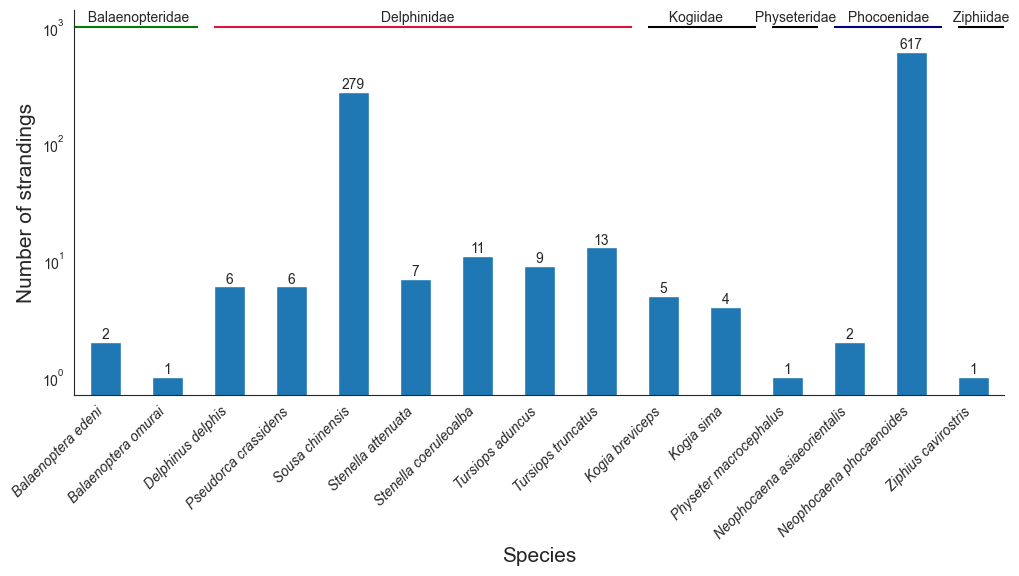

In [23]:
species_group_order = ['Balaenoptera edeni','Balaenoptera omurai','Delphinus delphis',
                'Pseudorca crassidens','Sousa chinensis','Stenella attenuata','Stenella coeruleoalba',
                'Tursiops aduncus','Tursiops truncatus','Kogia breviceps','Kogia sima','Physeter macrocephalus',
                'Neophocaena asiaeorientalis','Neophocaena phocaenoides', 'Ziphius cavirostris']
df['Species'] = pd.Categorical(df['Species'], categories=species_group_order, ordered=True)
month_counts = df[df['Species']!='Unidentified species'].groupby('Species').size()

sns.set_style("white")
plt.figure(figsize=(12, 5))
month_counts.plot(kind='bar')
plt.xlabel('Species', fontsize=15)
plt.ylabel('Number of strandings', fontsize=15)
plt.xticks(rotation=45, ha="right", style='italic') 

for index, value in enumerate(month_counts.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')

plt.hlines(y=1000, xmin=-0.5, xmax=1.5, color='green')
plt.text(0.5, 1200, ' Balaenopteridae', va='center', ha='center')

plt.hlines(y=1000, xmin=1.75, xmax=8.5, color='crimson')
plt.text(5, 1200, ' Delphinidae', va='center', ha='center')

plt.hlines(y=1000, xmin=8.75, xmax=10.5, color='black')
plt.text(9.5, 1200, ' Kogiidae', va='center', ha='center')

plt.hlines(y=1000, xmin=11.75, xmax=13.5, color='navy')
plt.text(12.6, 1200, ' Phocoenidae', va='center', ha='center')

plt.hlines(y=1000, xmin=10.75, xmax=11.5, color='black')
plt.text(11.1, 1200, ' Physeteridae', va='center', ha='center', rotation=0)

plt.hlines(y=1000, xmin=13.75, xmax=14.5, color='black')
plt.text(14.1, 1200, ' Ziphiidae', va='center', ha='center')

plt.yscale('log')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


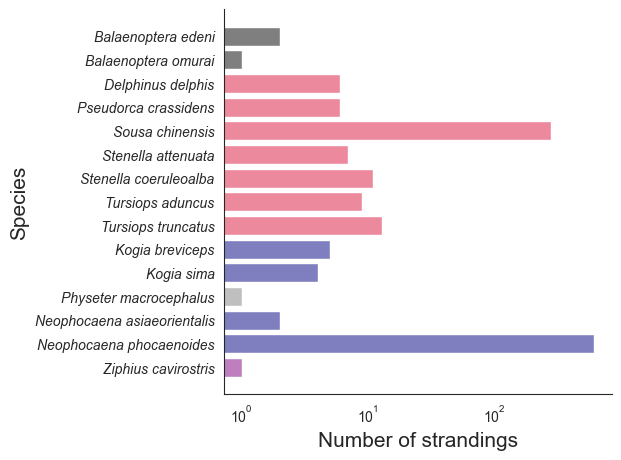

In [24]:
species_palette = {
    'Balaenoptera edeni': 'black',
    'Balaenoptera omurai': 'black',
    'Delphinus delphis': 'crimson',  
    'Pseudorca crassidens': 'crimson',  
    'Sousa chinensis': 'crimson',
    'Stenella attenuata': 'crimson',  
    'Stenella coeruleoalba': 'crimson',  
    'Tursiops aduncus': 'crimson',  
    'Tursiops truncatus': 'crimson',  
    'Kogia breviceps': 'navy',  
    'Kogia sima': 'navy',  
    'Physeter macrocephalus': 'grey',  
    'Neophocaena asiaeorientalis': 'navy',  
    'Neophocaena phocaenoides': 'navy',
    'Ziphius cavirostris': 'purple'  
}

species_group_order = ['Balaenoptera edeni','Balaenoptera omurai','Delphinus delphis','Pseudorca crassidens','Sousa chinensis',
                       'Stenella attenuata','Stenella coeruleoalba','Tursiops aduncus','Tursiops truncatus','Kogia breviceps',
                       'Kogia sima', 'Physeter macrocephalus','Neophocaena asiaeorientalis','Neophocaena phocaenoides', 'Ziphius cavirostris']
filtered_df = df[df['Species'].isin(species_group_order)].copy()
filtered_df['Species'] = pd.Categorical(filtered_df['Species'], categories=species_group_order, ordered=True)

# Proceed to plot
sns.set_style("white")
plt.figure(figsize=(5, 5))
sns.histplot(filtered_df, y='Species', hue='Species', palette=species_palette, shrink=.8)

plt.xscale('log')
plt.ylabel('Species', fontsize=15)
plt.xlabel('Number of strandings', fontsize=15)
plt.yticks(rotation=0, ha="right", style='italic')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.legend().remove()
plt.show()


In [25]:
for sp in df.sort_values(['Family', 'Species'], ascending=False).Species.unique():
    print(sp)

Ziphius cavirostris
nan
Physeter macrocephalus
Neophocaena phocaenoides
Neophocaena asiaeorientalis
Kogia sima
Kogia breviceps
Tursiops truncatus
Tursiops aduncus
Stenella coeruleoalba
Stenella attenuata
Sousa chinensis
Pseudorca crassidens
Delphinus delphis
Balaenoptera omurai
Balaenoptera edeni


In [ ]:
df = df.sort_values(['Family', 'Species'], ascending=False)
species_counts = df['Species'].value_counts()
plt.figure(figsize=(5, 8))
species_order = ['Unidentified species', 
    'Ziphius cavirostris', 'Physeter macrocephalus', 
       'Neophocaena phocaenoides', 'Neophocaena asiaeorientalis', 'Kogia spp.',
        'Kogia sima', 'Kogia breviceps', 
       'Tursiops spp.', 'Tursiops truncatus', 'Tursiops aduncus',
       'Steno bredanensis', 'Stenella longirostris',
       'Stenella coeruleoalba', 'Stenella attenuata',
       'Sousa chinensis', 'Pseudorca crassidens', #'Lagenodelphis hosei',
       'Globicephala macrorhynchus', 'Grampus griseus','Delphinus delphis', 'Balaenoptera spp.',
       'Balaenoptera omurai', 'Balaenoptera edeni']

for species in species_order:
    count = species_counts[species]
    family = df[df['Species'] == species]['Family'].iloc[0]
    color = family_color_palette[family]
    pattern = species_patterns.get(species, '')
    plt.barh(species, count, color=color, hatch=pattern, edgecolor='black', label=family if species == df['Species'].unique()[0] else "") 
    plt.text(count+0.1, species, f' {count}', va='center', ha='left', color='black', fontsize=15)

plt.xlabel('No. of strandings', fontsize=18)
plt.ylabel('Species', fontsize=18)
plt.yticks(rotation=0, ha="right", style='italic', fontsize=14)
plt.xscale('log')
plt.xticks([])

family_labels = list(family_color_palette.keys())
handles = [Line2D([0], [0], marker='o', color='w', markeredgecolor='black', label=label,
                  markerfacecolor=color, markersize=12) for label, color in family_color_palette.items()]
plt.legend(handles=handles, title='Family', ncol=7, bbox_to_anchor=(1, -.1), loc='upper center', fancybox=False, shadow=True, frameon=False, handletextpad=0.01, fontsize=15)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

KeyError: 'Unidentified species'

<Figure size 500x800 with 0 Axes>

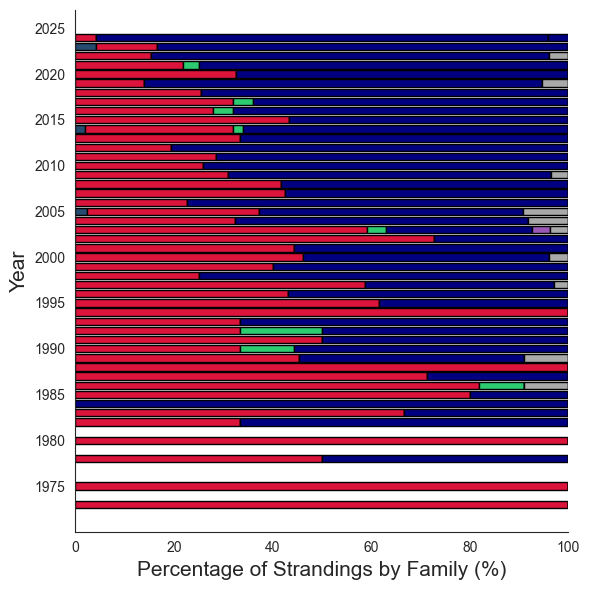

In [ ]:
df_grouped = df[df['Year']>1972].groupby(['Year', 'Family']).size().reset_index(name='Counts')
df_pivot = df_grouped.pivot(index='Year', columns='Family', values='Counts').fillna(0)
df_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100 

ordered_families = df_percentage.columns.intersection(family_color_palette.keys())
missing_families = set(family_color_palette.keys()) - set(ordered_families)
full_ordered_families = ordered_families.tolist() + list(missing_families)

df_percentage_ordered = df_percentage[full_ordered_families].fillna(0)

plt.figure(figsize=(6, 6))
bottom = None
for family in full_ordered_families:
    plt.barh(df_percentage_ordered.index, df_percentage_ordered[family], color=family_color_palette[family], left=bottom, edgecolor='black', label=family)
    bottom = bottom + df_percentage_ordered[family] if bottom is not None else df_percentage_ordered[family]

plt.xlabel('Percentage of Strandings by Family (%)', fontsize=15)
plt.ylabel('Year', fontsize=15)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
count_df = df[['Species', 'Year']][df['Species_Category']=='Sousa chinensis'].groupby('Year').count().reset_index()
count_df = count_df.set_index('Year').reindex(range(1973, 2025), fill_value=0).reset_index()

In [ ]:
species_color_palette = {
    'Sousa chinensis': 'crimson',
    'Neophocaena phocaenoides': 'navy',
    'Others':'darkgrey'
}

marker_list ={
    'Sousa chinensis': 'o',
    'Neophocaena phocaenoides': 'D',
    'Others':'s'
}
count_df = df[['Species', 'Year']][df['Species_Category']=='Sousa chinensis'].groupby('Year').count().reset_index()
count_df = count_df.set_index('Year').reindex(range(1973, 2025), fill_value=0).reset_index()
count_df.columns = ('Year', 'Count')
count_df['Year'] = pd.to_numeric(count_df['Year'], errors='coerce')
count_df['Count'] = pd.to_numeric(count_df['Count'], errors='coerce')

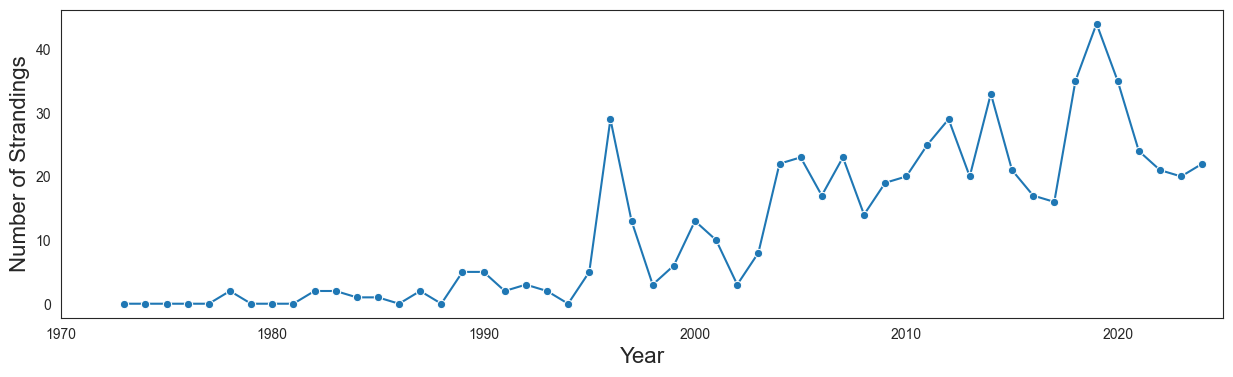

In [ ]:
sns.set_style('white')
plt.figure(figsize=(15, 4))

sns.lineplot(data=count_df, x='Year', y='Count', marker='o', errorbar=None)

plt.xlim(1970, 2025)
plt.ylabel('Number of Strandings', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

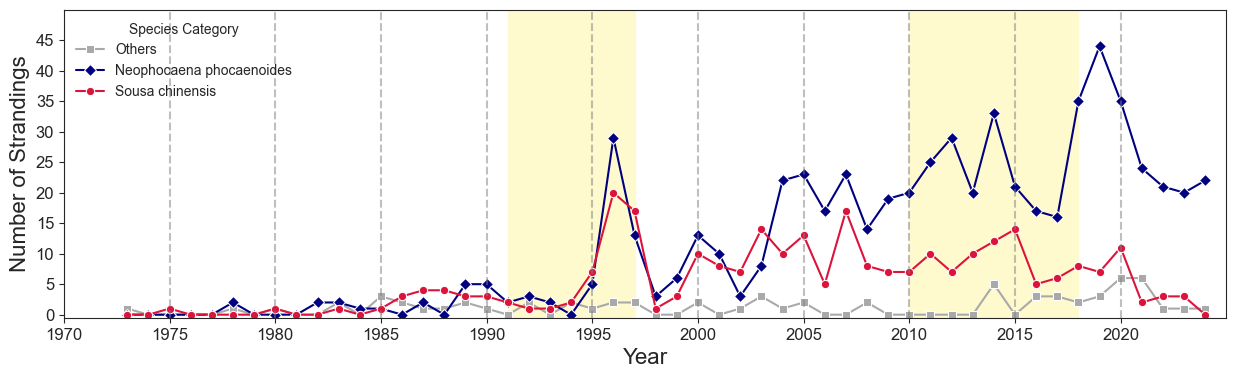

In [27]:
plt.figure(figsize=(15, 4)) 

species_color_palette = {
    'Sousa chinensis': 'crimson',
    'Neophocaena phocaenoides': 'navy',
    'Others':'darkgrey'
}

marker_list ={
    'Sousa chinensis': 'o',
    'Neophocaena phocaenoides': 'D',
    'Others':'s'
}

for species in df.Species_Category.unique():
    count_df = df[['Species', 'Year']][df['Species_Category']==species].groupby('Year').count().reset_index()
    count_df = count_df.set_index('Year').reindex(range(1973, 2025), fill_value=0).reset_index()
    count_df.columns = ('Year', 'Count')
    count_df['Year'] = pd.to_numeric(count_df['Year'], errors='coerce')
    count_df['Count'] = pd.to_numeric(count_df['Count'], errors='coerce')
    
    sns.lineplot(data=count_df, x='Year', y='Count', errorbar=None,
                 color=species_color_palette[species],label=species, marker=marker_list[species])

plt.xlim(1970, 2025)
plt.xticks(ticks=range(1970, 2025, 5), fontsize=12)
for yy in range(1970, 2025, 5):
    plt.axvline(x=yy, color='grey', linestyle='--', alpha=0.5)
plt.ylabel('Number of Strandings', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(ticks=range(0, 50, 5), fontsize=12)
plt.ylim(-0.5, 50)
plt.fill_between(x=(1991, 1997), y1=-1, y2=50, color='lemonchiffon')
plt.fill_between(x=(2010, 2018), y1=-1, y2=50, color='lemonchiffon')
plt.legend(title='Species Category', frameon=False)
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.show()


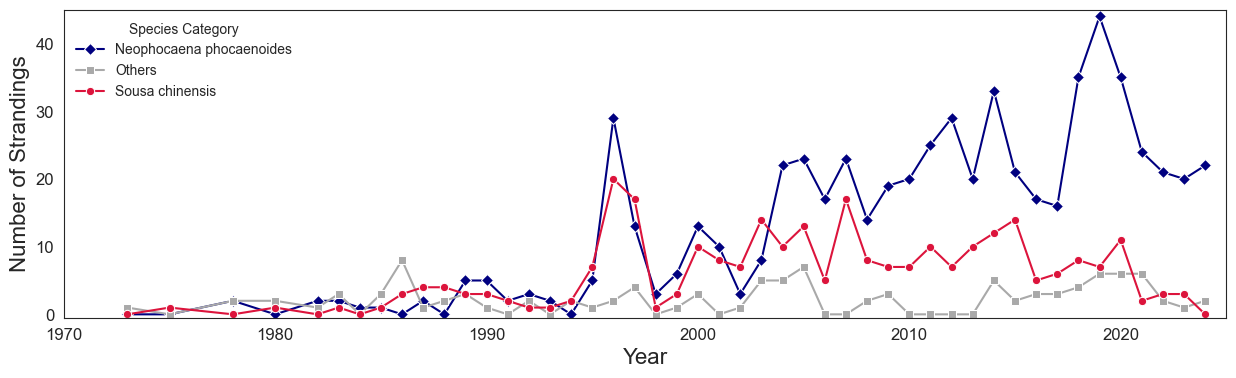

In [28]:
total_counts['Counts'] = pd.to_numeric(total_counts['Counts'], errors='coerce').fillna(0)
count_by_year = total_counts.pivot(index='Year', columns='Species_Category', values='Counts').fillna(0)
count_by_year.index = pd.to_numeric(count_by_year.index, errors='coerce')
count_by_year = count_by_year.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot the data
sns.set_style('white')
plt.figure(figsize=(15, 4))





# Plot each species
for species in count_by_year.columns:
    sns.lineplot(data=count_by_year, x=count_by_year.index, y=species, 
                 color=species_color_palette.get(species, 'black'), label=species, marker=marker_list.get(species, 'o'))

plt.xlim(1970, 2025)
plt.ylim(0, total_counts['Counts'].max())
plt.ylabel('Number of Strandings', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.5, 45)
plt.legend(title='Species Category', frameon=False)
plt.show()

/var/folders/j4/3gpdgvn54ts8s2nb5sm3wlx40000gn/T/ipykernel_65632/1307340213.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=12)
/var/folders/j4/3gpdgvn54ts8s2nb5sm3wlx40000gn/T/ipykernel_65632/1307340213.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, ha="right", style='italic', fontsize=12)
/var/folders/j4/3gpdgvn54ts8s2nb5sm3wlx40000gn/T/ipykernel_65632/1307340213.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), fontsize=12)
/var/folders/j4/3gpdgvn54ts8s2nb5sm3wlx40000gn/T/ipykernel_65632/1307340213.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha="right", fontsize=12)


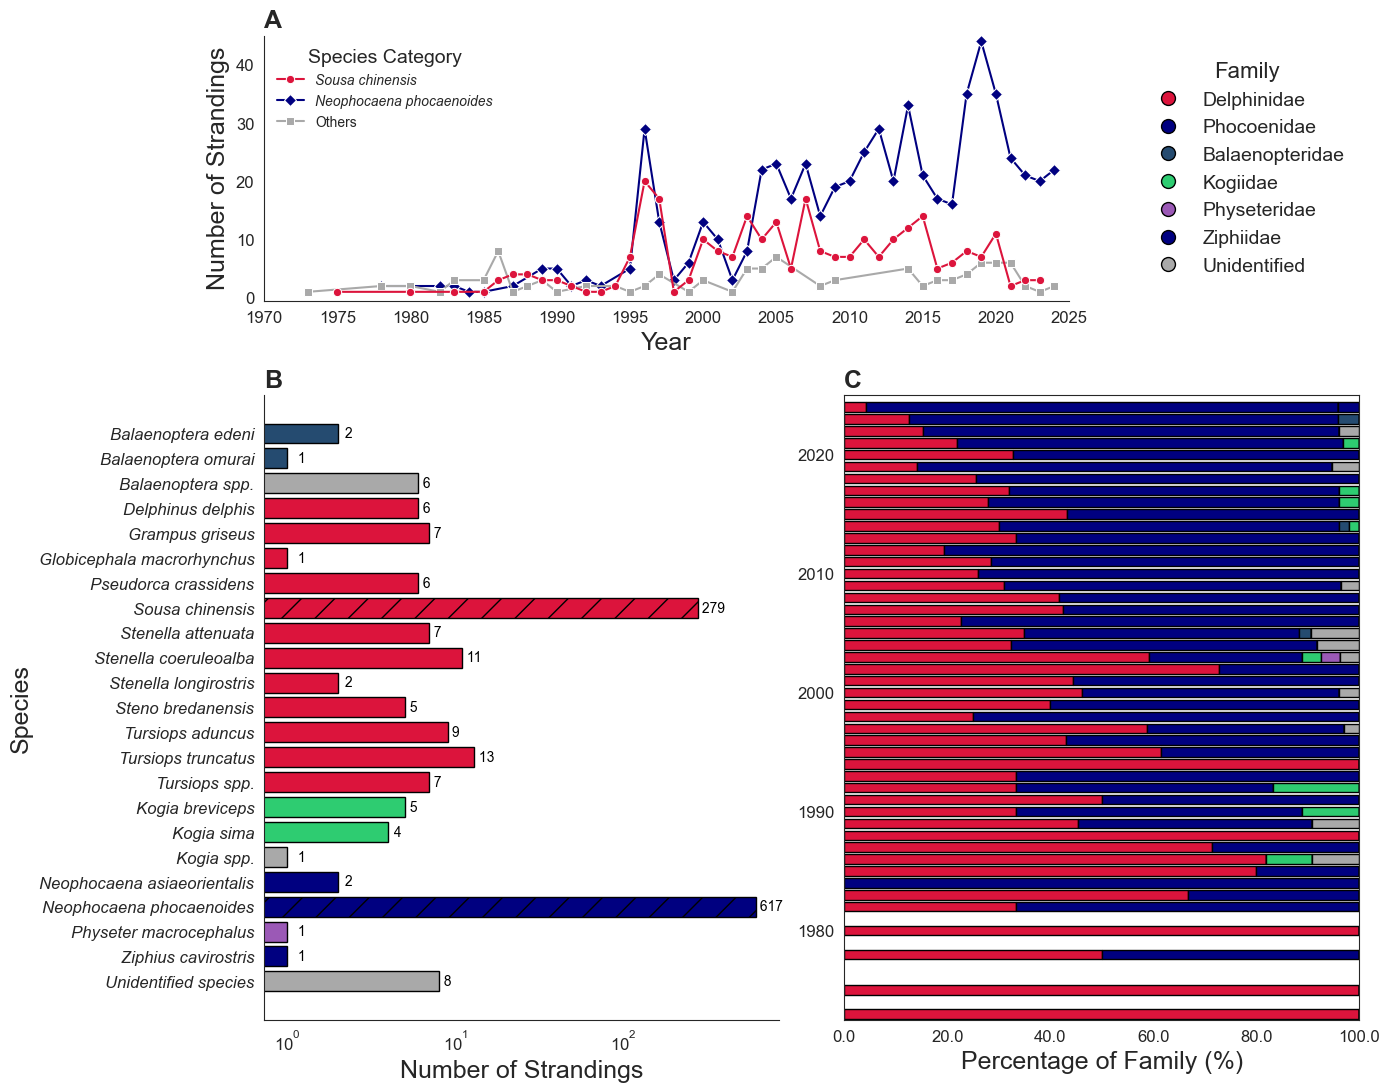

In [14]:
import matplotlib.gridspec as gridspec

sns.set_style('white')
fig = plt.figure(figsize=(14, 14))

gs = gridspec.GridSpec(4, 4) 
ax0 = fig.add_subplot(gs[0:1, 0:3])
ax1 = fig.add_subplot(gs[1:3, 0:2])
ax2 = fig.add_subplot(gs[1:3, 2:4])
ax4 = fig.add_subplot(gs[0:1, 3])

df['Year'] = df['Year'].astype(int)
total_counts = df[df['Year'] > 1970].groupby(['Year', 'Species_Category']).size().reset_index(name='Counts')
count_by_year = total_counts.pivot(index='Year', columns='Species_Category', values='Counts')

for species in count_by_year.columns:
    sns.lineplot(data=count_by_year, x=count_by_year.index, y=species, 
                 color=species_color_palette[species], label=species, marker=marker_list[species], ax=ax0)
ax0.set_xlim(1970, 2025)
ax0.set_ylim(-0.5, 45)
ax0.set_ylabel('Number of Strandings', fontsize=18)
ax0.set_xlabel('Year', fontsize=18)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)
ax0.xaxis.set_major_locator(ticker.MultipleLocator(5))

handles, labels = ax0.get_legend_handles_labels()
order = ['Sousa chinensis', 'Neophocaena phocaenoides', 'Others'] 
ordered_handles = [None] * len(order)
for handle, label in zip(handles, labels):
    if label in order:
        ordered_handles[order.index(label)] = handle

for index, handle in enumerate(ordered_handles):
    if handle is None:
        print(f"Warning: No matching plot found for label '{order[index]}'. Legend item will be missing.")

ax0.legend(handles=[h for h in ordered_handles if h], labels=[o for h, o in zip(ordered_handles, order) if h], title='Species Category', title_fontsize=14, frameon=False)
legend = ax0.get_legend()
for text in legend.get_texts():
    if text.get_text() in ['Sousa chinensis', 'Neophocaena phocaenoides']:
        text.set_fontstyle('italic')

# Subplot 2
df_sorted = df.sort_values(['Family', 'Species'], ascending=False)
species_counts = df_sorted['Species'].value_counts()
for species in species_order:
    count = species_counts.get(species, 0)  
    if count > 0:  
        family = df_sorted[df_sorted['Species'] == species]['Family'].iloc[0]
        color = family_color_palette.get(family, 'grey')  
        pattern = species_patterns.get(species, '')  
        ax1.barh(species, count, color=color, hatch=pattern, edgecolor='black', label=family)
        ax1.text(count+0.1, species, f' {count}', va='center', ha='left', color='black')

handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  

ax1.set_xlabel('Number of Strandings', fontsize=18)
ax1.set_ylabel('Species', fontsize=18)
ax1.set_xticklabels(ax1.get_xticks(), fontsize=12)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, ha="right", style='italic', fontsize=12)
ax1.set_xscale('log')

# Subplot 3
df_grouped = df[df['Year'] > 1972].groupby(['Year', 'Family']).size().reset_index(name='Counts')
df_pivot = df_grouped.pivot(index='Year', columns='Family', values='Counts').fillna(0)
df_pivot = df_pivot[['Delphinidae', 'Phocoenidae', 'Balaenopteridae', 'Kogiidae', 'Physeteridae', 'Ziphiidae', 'Unidentified']]
df_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

ordered_families = df_percentage.columns.intersection(family_color_palette.keys())
missing_families = set(family_color_palette.keys()) - set(ordered_families)
full_ordered_families = ordered_families.tolist() + list(missing_families)
df_percentage_ordered = df_percentage[full_ordered_families].fillna(0)

bottom = np.zeros(len(df_percentage_ordered))
for family in full_ordered_families:
    ax2.barh(df_percentage_ordered.index, df_percentage_ordered[family], 
             left=bottom, color=family_color_palette[family], 
             edgecolor='black', label=family)
    
    bottom += df_percentage_ordered[family].values

ax2.set_xticklabels(ax2.get_xticks(), fontsize=12)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha="right", fontsize=12)
ax2.set_ylim(1972.5, 2025)
ax2.set_xlabel('Percentage of Family (%)', fontsize=18)

# Legend plot
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=family_color_palette[family], 
                         markersize=10, markeredgecolor='black', label=family) for family in full_ordered_families]
ax4.legend(handles=legend_handles, title='Family', loc='center', title_fontsize=16, fontsize=14, fancybox=True, shadow=True, frameon=False)
ax4.axis('off') 
ax0.set_title("A", loc='left', fontsize=18, fontweight='bold') #(A) Stranding Numbers over Years
ax1.set_title("B", loc='left', fontsize=18, fontweight='bold') #(B) Stranding Numbers by Species
ax2.set_title("C", loc='left', fontsize=18, fontweight='bold') #(C) Percentage of Family Over Years

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

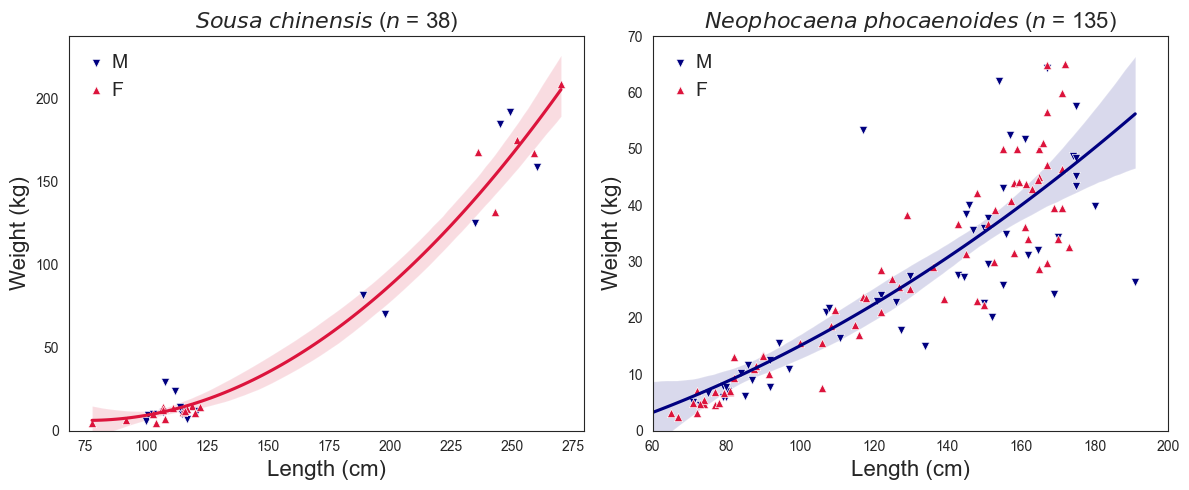

In [15]:
fig, ((ax1, ax2))= plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

n_sousa = len(df[(df['Species']=='Sousa chinensis')&(df['Code']!='5') & (df['Length_notes'].isnull()) & (df['Weight'].notnull())])
sns.regplot(x='Length', y='Weight', data=df[(df['Species']=='Sousa chinensis')&(df['Code']!='5') & (df['Length_notes'].isnull())], order=2, color='crimson', scatter=False, ax=ax1)
sns.scatterplot(x='Length', y='Weight', data=df[(df['Species']=='Sousa chinensis')&(df['Gender_Category']=='M')], color='navy', marker='v', ax=ax1, label='M')
sns.scatterplot(x='Length', y='Weight', data=df[(df['Species']=='Sousa chinensis')&(df['Gender_Category']=='F')], color='crimson', marker='^', ax=ax1, label='F')
ax1.set_title('$Sousa$ $chinensis$ ($n$ = {})'.format(n_sousa), fontsize=16)
ax1.set_ylabel('Weight (kg)', fontsize=16)
ax1.set_xlabel('Length (cm)', fontsize=16)
ax1.set_ylim(0,)
ax1.legend(loc='upper left', frameon=False, fontsize=14, handlelength=1.0, handletextpad=0.3)

n_np = len(df[(df['Species']=='Neophocaena phocaenoides')&(df['Code']!='5') & (df['Length_notes'].isnull()) & (df['Weight'].notnull())])
sns.regplot(x='Length', y='Weight', data=df[(df['Species']=='Neophocaena phocaenoides') & (df['Code']!='5') & (df['Length_notes'].isnull())], order=2, color='navy', scatter=False, ax=ax2)
sns.scatterplot(x='Length', y='Weight', data=df[(df['Species']=='Neophocaena phocaenoides') & (df['Code']!='5') & (df['Gender_Category']=='M')], color='navy', marker='v', ax=ax2, label='M')
sns.scatterplot(x='Length', y='Weight', data=df[(df['Species']=='Neophocaena phocaenoides') & (df['Code']!='5') & (df['Gender_Category']=='F')], color='crimson', marker='^', ax=ax2, label='F')
ax2.set_title('$Neophocaena$ $phocaenoides$ ($n$ = {})'.format(n_np), fontsize=16)
ax2.set_xlim(60,200)
ax2.set_ylim(0,70)
ax2.set_ylabel('Weight (kg)', fontsize=16)
ax2.set_xlabel('Length (cm)', fontsize=16)
ax2.legend(loc='upper left', frameon=False, fontsize=14, handlelength=1.0, handletextpad=0.3)

# sns.regplot(x='Length', y='Weight', data=df[(df['Species']!='Neophocaena phocaenoides') & (df['Species']!='Sousa chinensis')], order=2, color='black', scatter_kws={'s':10}, ax=ax3)
# # sns.scatterplot(x='Length', y='Weight', data=df[(df['Species_Category']=='Others') & (df['Code']!='5') & (df['Gender_Category']=='M')], color='navy', marker='v', ax=ax3, label='M')
# # sns.scatterplot(x='Length', y='Weight', data=df[(df['Species_Category']=='Others') & (df['Code']!='5') & (df['Gender_Category']=='F')], color='crimson', marker='^', ax=ax3, label='F')
# ax3.set_title('Other Species', fontsize=17)
# ax3.set_ylim(0,400)
# ax3.set_ylabel('Weight (kg)', fontsize=16)
# ax3.set_xlabel('Length (cm)', fontsize=16)

plt.tight_layout()

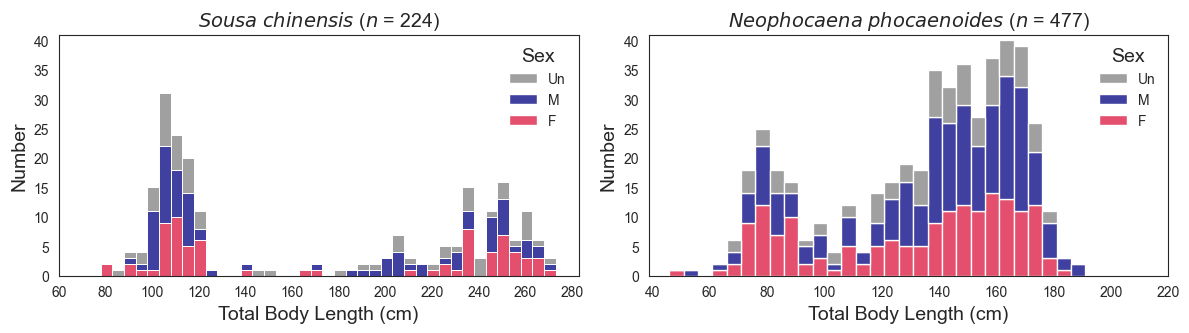

In [16]:
sns.set_style('white')
plt.figure(figsize=(12, 6))
gender_palette = {'M': 'navy', 'F': 'crimson', 'Un': 'grey'}

# Sousa chinensis
plt.subplot(2, 2, 1)
n_sousa = len(df[(df['Species'] == 'Sousa chinensis') & (df['Code']!='5') & (df['Length'].notnull())])
df_sousa = df[(df['Species'] == 'Sousa chinensis') & (df['Code']!='5') & (df['Length'].notnull())].sort_values('Gender_Category', ascending=False)
ax1 = sns.histplot(data=df_sousa, x="Length", binwidth=5, hue='Gender_Category', multiple='stack', palette=gender_palette)
ax1.set_title('$Sousa$ $chinensis$ ($n$ = {})'.format(n_sousa), fontsize=14)
ax1.set(yticks=np.arange(0, 41, 5), xticks=np.arange(60, 281, 20))
ax1.set_ylabel('Number', fontsize=14)
ax1.set_xlabel('Total Body Length (cm)', fontsize=14)
ax1.set_ylim(0,41)
legend = ax1.get_legend()
legend.set_title('Sex')
legend.set_frame_on(False)
legend.get_title().set_fontsize('14') 

# Neophocaena phocaenoides
plt.subplot(2, 2, 2)
n_np = len(df[(df['Species'] == 'Neophocaena phocaenoides') & (df['Code']!='5') & (df['Length'].notnull())])
df_np = df[(df['Species'] == 'Neophocaena phocaenoides') & (df['Code']!='5') & (df['Length'].notnull())].sort_values('Gender_Category', ascending=False)
ax2 = sns.histplot(data=df_np, x="Length", binwidth=5, hue='Gender_Category', multiple='stack', palette=gender_palette)
ax2.set_title('$Neophocaena$ $phocaenoides$ ($n$ = {})'.format(n_np), fontsize=14)
ax2.set(yticks=np.arange(0, 41, 5), xticks=np.arange(40, 221, 20))
ax2.set_ylabel('Number', fontsize=14)
ax2.set_xlabel('Total Body Length (cm)', fontsize=14)
ax2.set_ylim(0,41)
legend = ax2.get_legend()
legend.set_title('Sex')
legend.set_frame_on(False)
legend.get_title().set_fontsize('14') 

plt.tight_layout()
plt.show()


In [17]:
seawater_quality_df = pd.read_csv('/Users/hoyuenwa/Documents/Python Projects/HK_stranding/data/marine_water_quality.csv')
seawater_quality_df['Dates'] = pd.to_datetime(seawater_quality_df['Dates'])
seawater_quality_df['Month'] = seawater_quality_df['Dates'].dt.month
seawater_temp_data = seawater_quality_df.groupby('Month').mean('Temperature (°C)')['Temperature (°C)']
seawater_temp_df = pd.DataFrame(seawater_temp_data)

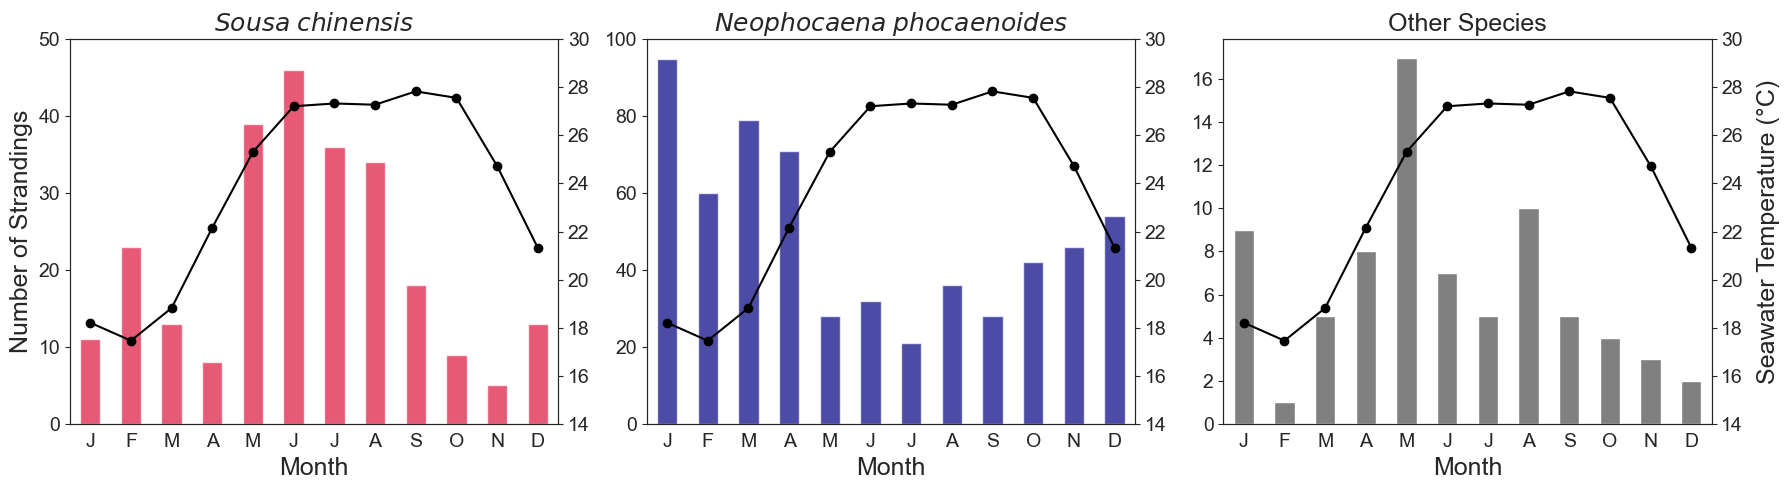

In [29]:
# Data for Sousa chinensis
sousa_counts = df[(df['Species'] == 'Sousa chinensis') & (df['Date']>pd.to_datetime('1993-01-01'))].groupby(['Month']).size()
neophocaena_counts = df[(df['Species'] == 'Neophocaena phocaenoides') & (df['Date']>pd.to_datetime('1993-01-01'))].groupby(['Month']).size()
others_counts = df[(df['Species_Category'] == 'Others') & (df['Date']>pd.to_datetime('1993-01-01'))].groupby(['Month']).size()

others_counts.index = others_counts.index.astype(int)
others_counts = others_counts.sort_index()
all_months = range(1, 13)
others_counts = others_counts.reindex(all_months, fill_value=0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5)) 

# Plot for Sousa chinensis
sousa_counts.plot(kind='bar', stacked=True, color='crimson', ax=ax1, legend=None, alpha=0.7)
ax1.set_title('$Sousa$ $chinensis$', fontsize=18)
ax1.set_xlabel('Month', fontsize=18)
ax1.set_ylabel('Number of Strandings', fontsize=18)
# ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
ax1.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'], rotation=0, fontsize=14)
ax1.set_ylim(0, 50)
ax1_twin = ax1.twinx()
ax1_twin.plot(seawater_temp_df.index - 1, seawater_temp_df['Temperature (°C)'], color='black', marker='o')
# ax1_twin.set_ylabel('Seawater Temperature (°C)', labelpad=10, fontsize=18)
ax1_twin.set_ylim(14, 30)
ax1.tick_params(axis='y', labelsize=14)
ax1_twin.tick_params(axis='y', labelsize=14)

# Plot for Neophocaena phocaenoides
neophocaena_counts.plot(kind='bar', stacked=True, color='navy', ax=ax2, legend=None, alpha=0.7)
ax2.set_title('$Neophocaena$ $phocaenoides$', fontsize=18)
ax2.set_xlabel('Month', fontsize=18)
# ax2.set_ylabel('Number of Strandings', fontsize=18)
ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'], rotation=0, fontsize=14)
ax2.set_ylim(0, 100)
ax2_twin = ax2.twinx()
ax2_twin.plot(seawater_temp_df.index - 1, seawater_temp_df['Temperature (°C)'], color='black', marker='o')
# ax2_twin.set_ylabel('Seawater Temperature (°C)', labelpad=10, fontsize=18)
ax2_twin.set_ylim(14, 30)
ax2.tick_params(axis='y', labelsize=14)
ax2_twin.tick_params(axis='y', labelsize=14)

# Plot for other species
others_counts.plot(kind='bar', stacked=True, color='grey', ax=ax3, legend=None)
ax3.set_title('Other Species', fontsize=18)
ax3.set_xlabel('Month', fontsize=18)
# ax3.set_ylabel('Number of Strandings', fontsize=18)
ax3.set_xticks(range(len(all_months)))
ax3_twin = ax3.twinx()
ax3_twin.set_ylim(14, 30)
ax3_twin.plot(seawater_temp_df.index - 1, seawater_temp_df['Temperature (°C)'], color='black', marker='o')
ax3.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'], rotation=0, fontsize=14)
ax3_twin.set_ylabel('Seawater Temperature (°C)', labelpad=10, fontsize=18)
ax3.tick_params(axis='y', labelsize=14)
ax3_twin.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()


/var/folders/j4/3gpdgvn54ts8s2nb5sm3wlx40000gn/T/ipykernel_65632/3886716202.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
/var/folders/j4/3gpdgvn54ts8s2nb5sm3wlx40000gn/T/ipykernel_65632/3886716202.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)


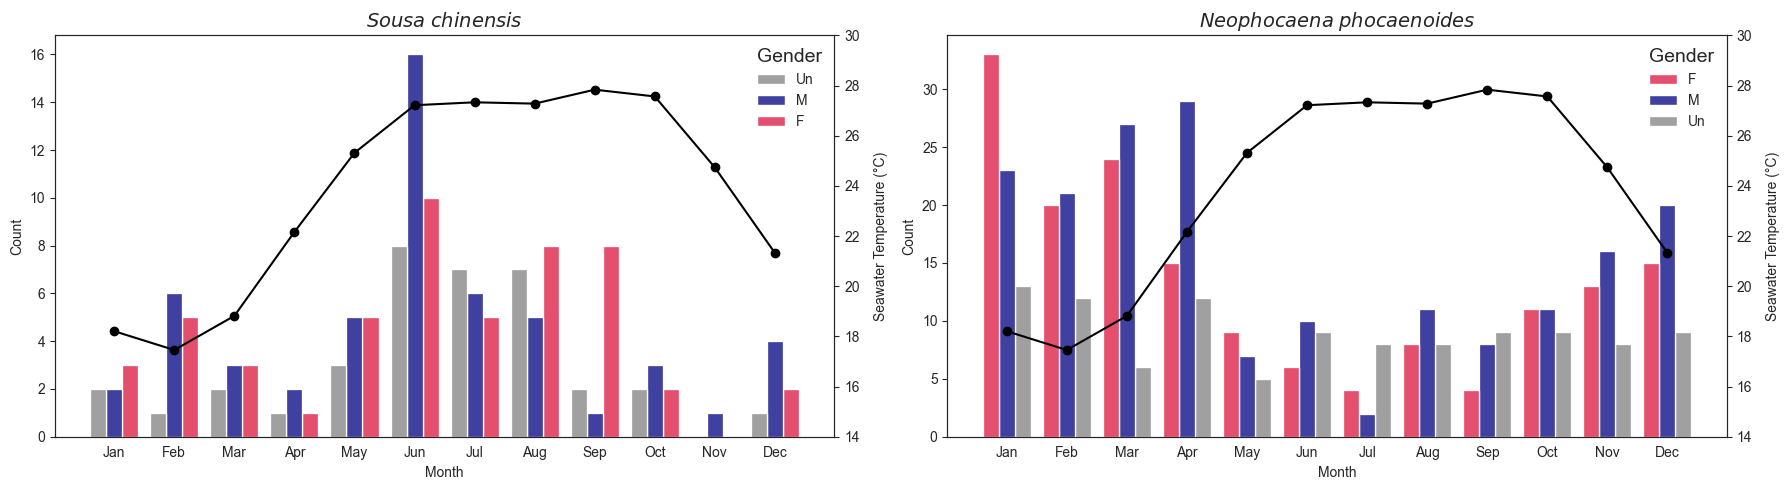

In [31]:
sorted_df = df[df['Date']>pd.to_datetime('2006-01-01')].sort_values('Month')

month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
sorted_df['Month_Label'] = sorted_df['Month'].map(month_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5)) 
gender_palette = {'M': 'navy', 'F': 'crimson', 'Un': 'grey'}

sns.histplot(x='Month_Label', data=sorted_df[sorted_df['Species']=='Sousa chinensis'], 
             hue='Gender_Category', multiple='dodge', palette=gender_palette, shrink=.8, ax=ax1)
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.set_title('$Sousa$ $chinensis$', fontsize=14)
legend = ax1.get_legend()
legend.set_title('Gender', prop={'size': 14})
legend._legend_box.align = "left"
legend.set_frame_on(False)

ax1_twin = ax1.twinx()
ax1_twin.plot(seawater_temp_df.index - 1, seawater_temp_df['Temperature (°C)'], color='black', marker='o') #, markerfacecolor='none', markeredgewidth=2
ax1_twin.set_ylabel('Seawater Temperature (°C)', labelpad=10)
ax1_twin.set_ylim(14, 30)

sns.histplot(x='Month_Label', data=sorted_df[sorted_df['Species']=='Neophocaena phocaenoides'], 
             hue='Gender_Category', multiple='dodge', palette=gender_palette, shrink=.8, ax=ax2)

ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')
ax2.set_title('$Neophocaena$ $phocaenoides$', fontsize=14)
legend = ax2.get_legend()
legend.set_title('Gender', prop={'size': 14})
legend._legend_box.align = "left"
legend.set_frame_on(False)

ax2_twin = ax2.twinx()
ax2_twin.plot(seawater_temp_df.index - 1, seawater_temp_df['Temperature (°C)'], color='black', marker='o') #, markerfacecolor='none', markeredgewidth=2
ax2_twin.set_ylabel('Seawater Temperature (°C)', labelpad=10)
ax2_twin.set_ylim(14, 30)

# # ax3
# others_df = sorted_df[sorted_df['Species_Category'] == 'Others']
# others_counts = others_df.groupby(['Family','Month']).size().reset_index(name='Counts')
# full_months = pd.DataFrame({'Month': range(1, 13)})
# complete_others_counts = pd.merge(full_months, others_counts, on='Month', how='left')
# complete_others_counts['Counts'] = complete_others_counts['Counts'].fillna(0)
# complete_others_counts['Month_Label'] = complete_others_counts['Month'].map(month_labels)
# sns.histplot(data=complete_others_counts, x='Month_Label', weights='Counts', hue='Family', multiple='stack', palette=family_color_palette, shrink=.8, ax=ax3)
# # Set x-axis labels and title for ax3
# ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
# ax3.set_xlabel('Month')
# ax3.set_ylabel('Count')
# ax3.set_title('Other Species', fontsize=14)
# legend = ax3.get_legend()
# legend.set_title('Family', prop={'size': 14})
# legend._legend_box.align = "left"
# legend.set_frame_on(False)

plt.tight_layout()
plt.show()

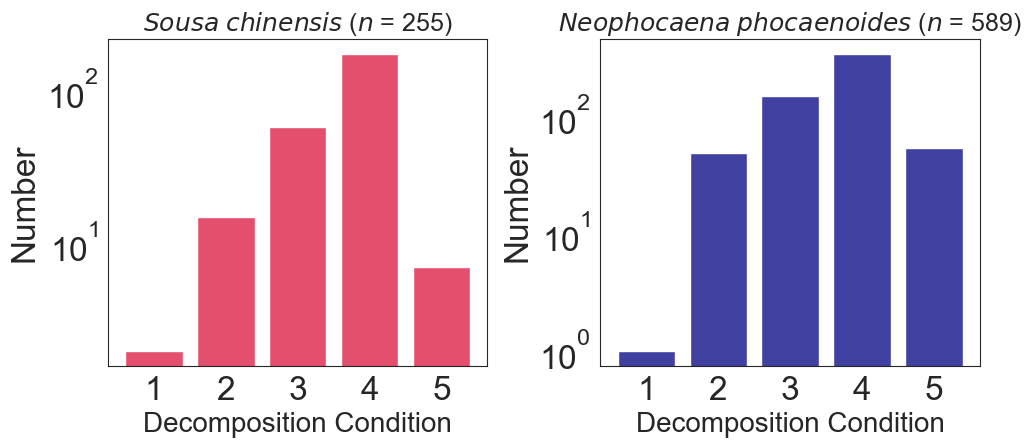

In [33]:
sns.set_style('white')
plt.figure(figsize=(10, 8)) 

# Sousa chinensis
plt.subplot(2, 2, 1) 

df_sousa = df[(df['Species']=='Sousa chinensis') & (df['Code']!='?') & (df['Code']!='---')].sort_values('Code', ascending=True).dropna(subset=['Code'])
df_sousa['Code'] = df_sousa['Code'].astype(int)
bins_sousa = np.arange(df_sousa['Code'].min() - 0.5, df_sousa['Code'].max() + 1.5, 1)
sns.histplot(data=df_sousa, x="Code", bins=bins_sousa, color='crimson', shrink=0.8)
n_sousa = len(df_sousa)
plt.xticks(range(int(df_sousa['Code'].min()), int(df_sousa['Code'].max()) + 1), fontsize=24)
plt.yticks(fontsize=24)
plt.title('$Sousa$ $chinensis$ ($n$ = {})'.format(n_sousa), fontsize=18)
plt.ylabel('Number', fontsize=24)
plt.xlabel('Decomposition Condition', fontsize=20)
plt.yscale('log')

# Neophocaena phocaenoides
plt.subplot(2, 2, 2)
df_np = df[(df['Species']=='Neophocaena phocaenoides') & (df['Code']!='?') & (df['Code']!='---')].sort_values('Code', ascending=True).dropna(subset=['Code'])
df_np['Code'] = df_np['Code'].astype(int)
bins_np = np.arange(df_np['Code'].min() - 0.5, df_np['Code'].max() + 1.5, 1)
sns.histplot(data=df_np, x="Code", bins=bins_np, color='navy', shrink=0.8)
n_np = len(df_np)
plt.xticks(range(int(df_np['Code'].min()), int(df_np['Code'].max()) + 1), fontsize=24)
plt.yticks(fontsize=24)
plt.title('$Neophocaena$ $phocaenoides$ ($n$ = {})'.format(n_np), fontsize=18)
plt.ylabel('Number', fontsize=24)
plt.xlabel('Decomposition Condition', fontsize=20)
plt.yscale('log')
# sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()
plt.show()

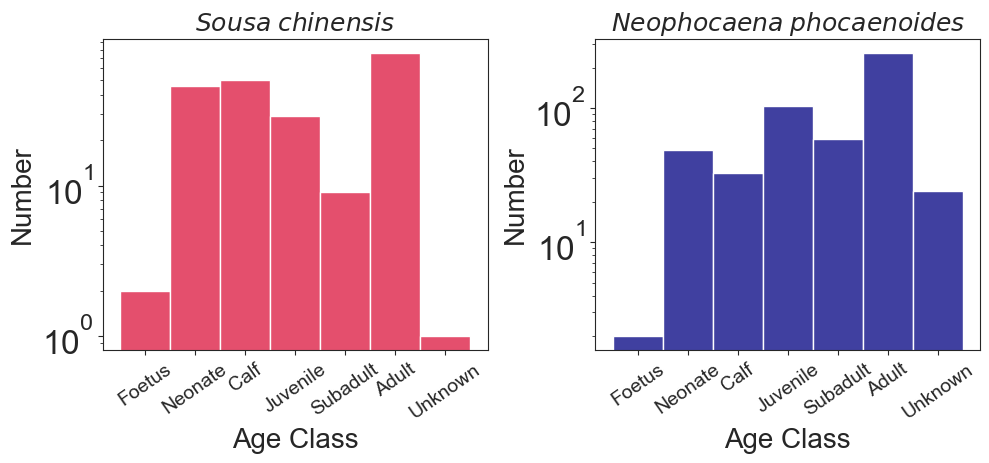

In [34]:
age_order = ['Foetus', 'Neonate', 'Calf', 'Juvenile', 'Subadult', 'Adult', 'Unknown']
df['AgeGroup_Category'] = pd.Categorical(df['AgeGroup_Category'], categories=age_order, ordered=True)

sns.set_style('white')
plt.figure(figsize=(10, 8)) 

# Sousa chinensis
plt.subplot(2, 2, 1) 
df_sousa = df[df['Species']=='Sousa chinensis'].sort_values('AgeGroup_Category', ascending=True)
sns.histplot(data=df_sousa, x="AgeGroup_Category", bins=30, color='crimson')
plt.title('$Sousa$ $chinensis$', fontsize=18)
plt.yticks(fontsize=24)
plt.xticks(rotation=35, ha="center", fontsize=14) 
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.ylabel('Number', fontsize=20)
plt.xlabel('Age Class', fontsize=20)
plt.yscale('log')

# Neophocaena phocaenoides
plt.subplot(2, 2, 2)
df_np = df[df['Species']=='Neophocaena phocaenoides'].sort_values('AgeGroup_Category', ascending=True)
sns.histplot(data=df_np, x="AgeGroup_Category", bins=30, color='navy')
plt.title('$Neophocaena$ $phocaenoides$', fontsize=18)
plt.ylabel('Number', fontsize=20)
plt.xlabel('Age Class', fontsize=20)
plt.yticks(fontsize=24)
plt.xticks(rotation=35, ha="center", fontsize=14) 
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.yscale('log')

plt.tight_layout()
plt.show()


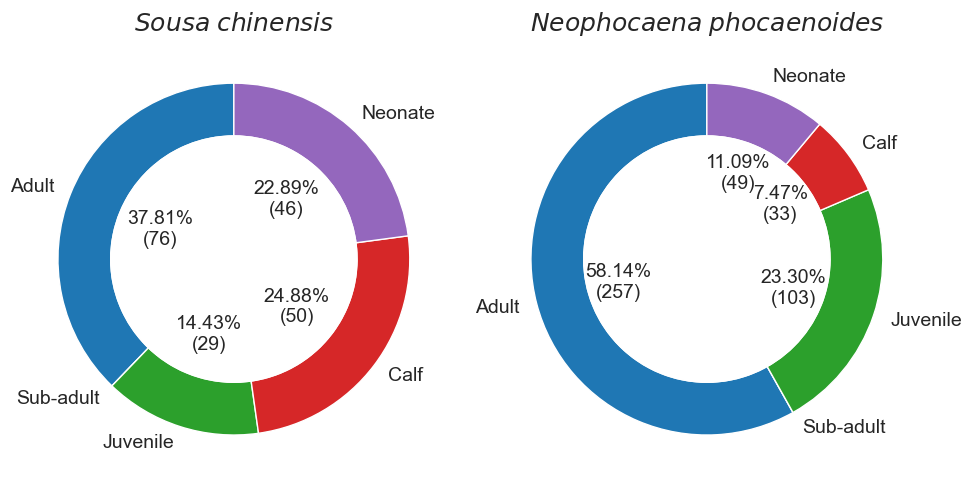

In [35]:
fig, axes = plt.subplots(1,2, figsize=(10, 8)) 
age_group_order = ['Adult', 'Sub-adult', 'Juvenile', 'Calf', 'Neonate']

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct, v=val) if pct > 0 else ''
    return my_format

# Sousa chinensis decomposition count and pie chart
df_sousa = df[(df['Species'] == 'Sousa chinensis') & (df['AgeGroup_Category']!='CD') & (df['AgeGroup_Category']!='Unknown') \
                   & (df['AgeGroup_Category']!='nan') & (df['AgeGroup_Category']!='Foetus')]
decomposition_counts_sousa = df_sousa['AgeGroup_Category'].value_counts().reindex(age_group_order).fillna(0)
autopcts_sousa = autopct_format(decomposition_counts_sousa.values)

axes[0].pie(decomposition_counts_sousa, labels=decomposition_counts_sousa.index, autopct=autopcts_sousa, startangle=90, wedgeprops=dict(width=0.3), pctdistance=0.45, textprops={'fontsize': 14})
centre_circle = plt.Circle((0, 0), 0.70, color='white')
axes[0].add_artist(centre_circle)
axes[0].set_aspect('equal')
axes[0].set_title('$Sousa$ $chinensis$', fontsize=18)

# Neophocaena phocaenoides decomposition count and pie chart
df_np = df[(df['Species'] == 'Neophocaena phocaenoides') &  (df['AgeGroup_Category']!='CD') & (df['AgeGroup_Category']!='Unknown') \
                   & (df['AgeGroup_Category']!='nan') & (df['AgeGroup_Category']!='Foetus')]
decomposition_counts_np = df_np['AgeGroup_Category'].value_counts().reindex(age_group_order).fillna(0)
autopcts_np = autopct_format(decomposition_counts_np.values)
axes[1].pie(decomposition_counts_np, labels=decomposition_counts_np.index,  autopct=autopcts_np, startangle=90, wedgeprops=dict(width=0.3), pctdistance=0.52, textprops={'fontsize': 14})
centre_circle = plt.Circle((0, 0), 0.70, color='white')
axes[1].add_artist(centre_circle)
axes[1].set_aspect('equal')
axes[1].set_title('$Neophocaena$ $phocaenoides$', fontsize=18)

plt.tight_layout()
plt.show()


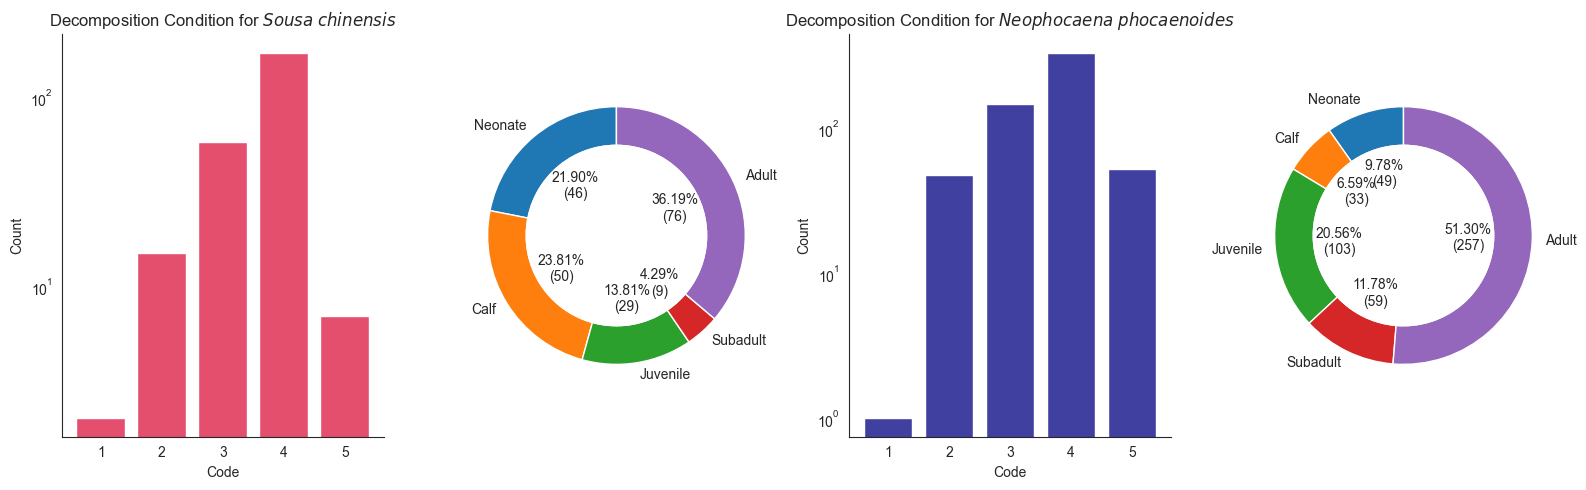

In [37]:
sns.set_style('white')
fig, axes = plt.subplots(1, 4, figsize=(16, 5)) 
age_group_order = ['Neonate', 'Calf', 'Juvenile', 'Subadult', 'Adult']

df_sousa = df[(df['Species']=='Sousa chinensis') & (df['Code']!='?') & (df['Code']!='---')].sort_values('Code', ascending=True).dropna(subset=['Code'])
df_sousa['Code'] = df_sousa['Code'].astype(int)
bins_sousa = np.arange(df_sousa['Code'].min() - 0.5, df_sousa['Code'].max() + 1.5, 1)
sns.histplot(data=df_sousa, x="Code", bins=bins_sousa, color='crimson', shrink=0.8, ax=axes[0])
axes[0].set_xticks(range(int(df_sousa['Code'].min()), int(df_sousa['Code'].max()) + 1))
axes[0].set_title('Decomposition Condition for $Sousa$ $chinensis$')
axes[0].set_yscale('log')
sns.despine(top=True, right=True, left=False, bottom=False)

# Sousa chinensis age class pie chart
df_sousa_age = df_sousa[df_sousa['AgeGroup_Category'].isin(age_group_order)]
decomposition_counts_sousa = df_sousa_age['AgeGroup_Category'].value_counts()[age_group_order]
autopcts_sousa = autopct_format(decomposition_counts_sousa.values)
axes[1].pie(decomposition_counts_sousa, labels=decomposition_counts_sousa.index, autopct=autopcts_sousa, startangle=90, wedgeprops=dict(width=0.3), pctdistance=0.5)
centre_circle = plt.Circle((0, 0), 0.70, color='white')
axes[1].add_artist(centre_circle)
axes[1].set_aspect('equal')

# Neophocaena phocaenoides decomposition count and histogram
df_np = df[(df['Species']=='Neophocaena phocaenoides') & (df['Code']!='?') & (df['Code']!='---')].sort_values('Code', ascending=True).dropna(subset=['Code'])
df_np['Code'] = df_np['Code'].astype(int)
bins_np = np.arange(df_np['Code'].min() - 0.5, df_np['Code'].max() + 1.5, 1)
sns.histplot(data=df_np, x="Code", bins=bins_np, color='navy', shrink=0.8, ax=axes[2])
axes[2].set_xticks(range(int(df_np['Code'].min()), int(df_np['Code'].max()) + 1))
axes[2].set_title('Decomposition Condition for $Neophocaena$ $phocaenoides$')
axes[2].set_yscale('log')

# Neophocaena phocaenoides age class pie chart
df_np_age = df_np[df_np['AgeGroup_Category'].isin(age_group_order)]
decomposition_counts_np = df_np_age['AgeGroup_Category'].value_counts()[age_group_order]
autopcts_np = autopct_format(decomposition_counts_np.values)
axes[3].pie(decomposition_counts_np, labels=decomposition_counts_np.index,  autopct=autopcts_np, startangle=90, wedgeprops=dict(width=0.3), pctdistance=0.5)
centre_circle = plt.Circle((0, 0), 0.70, color='white')
axes[3].add_artist(centre_circle)
axes[3].set_aspect('equal')
# axes[3].set_title('Age class distribution for $Neophocaena$ $phocaenoides$')

# Adjust layout to fit everything nicely
plt.tight_layout()
plt.show()


## COD

In [38]:
cod_df = df.dropna(subset=['COD'])

print('Total cases:', cod_df.shape[0])
print('Undetermined:', cod_df[(cod_df['COD']=='Undetermined')| (cod_df['COD_category']=='Undetermined')].shape[0])

Total cases: 911
Undetermined: 788


In [39]:
cod_df[(cod_df['COD']!='Undetermined')&(cod_df['COD_category']!='Undetermined') & (cod_df['Species_Category']!='Others')][['Species','COD_category']].value_counts()

Species                   COD_category                
Neophocaena phocaenoides  Trauma                          18
                          Boat strike                     16
                          Entanglement                    13
Sousa chinensis           Boat strike                     12
                          Fishery by-catch                 8
Neophocaena phocaenoides  Fishery by-catch                 7
Sousa chinensis           Entanglement                     6
Neophocaena phocaenoides  Respiratory Disease              6
                          Parasitic Infection              5
Sousa chinensis           Drowning                         5
Neophocaena phocaenoides  Infectious Disease               4
                          Reproductive System Disease      4
                          Drowning                         4
                          Starvation                       2
Sousa chinensis           Asphyxiation                     1
Neophocaena phocaenoides  Repr

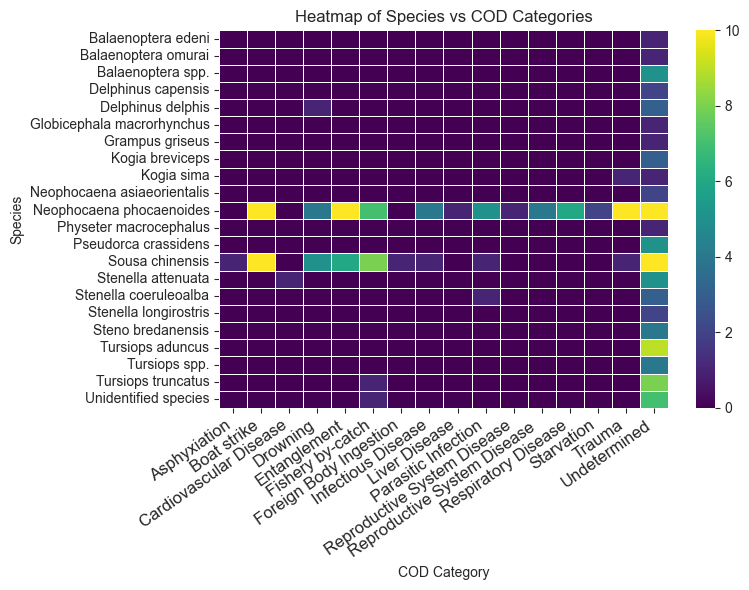

In [42]:
data_grouped = cod_df.groupby(['Species', 'COD_category']).size().unstack(fill_value=0)
categories = data_grouped.columns

# heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data_grouped, annot=False, cmap='viridis', fmt='d', linewidths=0.5, vmin=0, vmax=10)
plt.title('Heatmap of Species vs COD Categories')
plt.ylabel('Species')
plt.xlabel('COD Category')
plt.xticks(rotation=45)
ax.set_xticklabels(categories, rotation=35, ha='right', fontsize=12)
ax.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

plt.tight_layout()
plt.show()

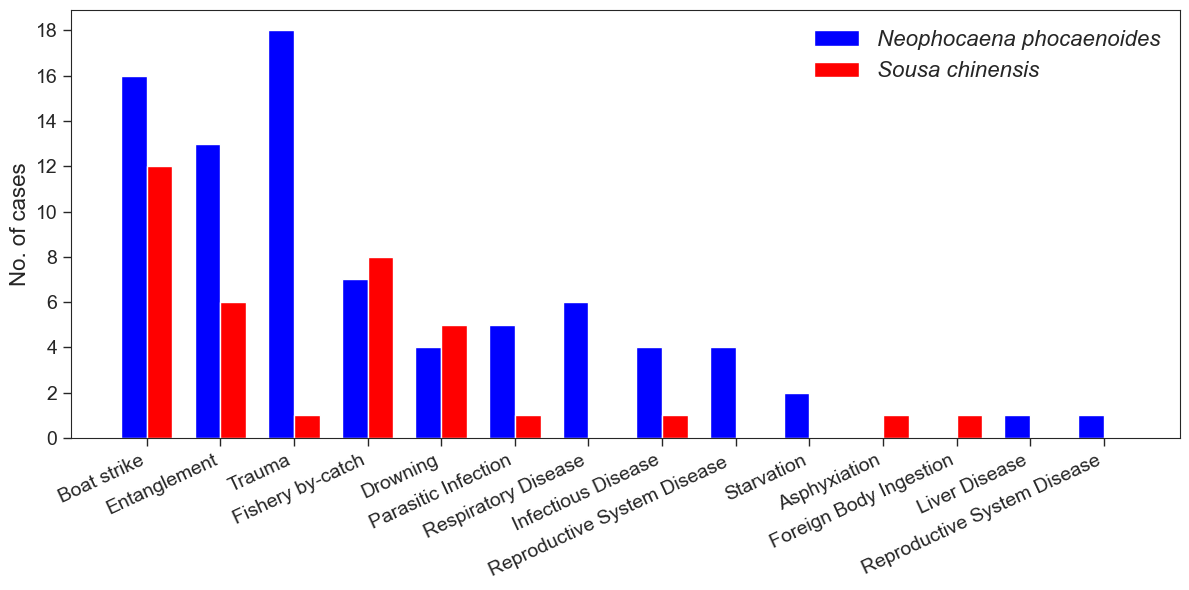

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = cod_df[(cod_df['COD']!='Undetermined') & 
              (cod_df['COD_category']!='Undetermined') & 
              (cod_df['Species_Category']!='Others')]

grouped_data = data.groupby(['COD_category', 'Species_Category']).size().unstack(fill_value=0)

grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data = grouped_data.sort_values(by='Total', ascending=False).drop(columns='Total')

categories = grouped_data.index
species = grouped_data.columns

bar_width = 0.35
index = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(12, 6)) 
bar1 = ax.bar(index, grouped_data[species[0]], bar_width, label=species[0], color='blue')
bar2 = ax.bar(index + bar_width, grouped_data[species[1]], bar_width, label=species[1], color='red')

ax.set_ylabel('No. of cases', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories, rotation=25, ha='right', fontsize=14)
ax.set_yticks(np.arange(0,20,2))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
ax.tick_params(axis='both', which='major', length=6, width=1, direction='out')
ax.legend(frameon=False, prop={'style': 'italic', 'size': 16})

plt.tight_layout()
plt.show()

## Map

In [44]:
### Loading Packages
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopandas.tools import sjoin
from shapely.geometry import box
from shapely import wkt
from shapely.geometry import Point, LineString, shape
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
import re, os, folium, h3pandas, glob
from matplotlib.ticker import FormatStrFormatter
import h3

In [45]:
effort_polygon = gpd.read_file('/Users/hoyuenwa/Documents/Python Projects/Occupancy/database_file/enc-per-effort2020/HKPRE_buffers250/HKPRE_buffer250.shp').to_crs("EPSG:4326")
grid_500 = gpd.read_file('/Users/hoyuenwa/Documents/Python Projects/Occupancy/Grid/HKEPRE_Grid_500m.shp').to_crs("EPSG:4326")
hkpre_land = gpd.read_file('/Users/hoyuenwa/Documents/Python Projects/Occupancy/shp/Basemap/HKPRE BaseMap (With River).shp').to_crs("EPSG:4326")
hk3rs = gpd.read_file('/Users/hoyuenwa/Documents/Python Projects/Occupancy/Map/Constructions/HK3RS/HK3RS.shp').to_crs("EPSG:4326")
hzmb = gpd.read_file('/Users/hoyuenwa/Documents/Python Projects/Occupancy/Map/Constructions/HKZMbridge/HKZMBridge.shp').to_crs("EPSG:4326")
hk_admin = gpd.read_file('/Users/hoyuenwa/Documents/Python Projects/Occupancy/Map/World/HK_Admin_Border/HK_border_polygon.shp').to_crs("EPSG:4326")
# HK Marine Parks
hk_marineparks = gpd.read_file('/Users/hoyuenwa/Documents/Python Projects/Occupancy/Map/Sousa/MarineParks/MaPks.shp').to_crs("EPSG:4326")
southmp = gpd.read_file('/Users/hoyuenwa/Documents/Python Projects/Occupancy/Map/Maps_from_Derek_20190118/MPAs/Proposed Southwest Marine Park/Proposed Southwest Lantau Marine Park.shp').to_crs("EPSG:4326")

hkpre_land2012 = hkpre_land.overlay(hk3rs, how='difference').overlay(hzmb, how='difference').to_crs("EPSG:4326") #Clip out land area of year 2012 before 3RS & HZMB construction
total_bounds2 = grid_500.total_bounds

epre_track_survey_area = gpd.read_file('/Users/hoyuenwa/Documents/Python Projects/Occupancy/hkpre_track_areas/epre_area3.shp').to_crs("EPSG:4326")
marine_areas = gpd.overlay(hk_admin, hkpre_land, how='difference')

In [46]:
resolution = 7
grid = hk_admin.h3.polyfill_resample(resolution).reset_index()
grid['grid_id'] = grid['h3_polyfill']
print("The total number of grid in the EPRE:", len(grid))

The total number of grid in the EPRE: 550


In [47]:
coastline_grid = gpd.overlay(grid, hkpre_land2012, how='intersection')
coastline_grid['length'] = coastline_grid.geometry.length
coastline_length_per_grid = coastline_grid.groupby('grid_id')['length'].sum().reset_index()
coastline_length = pd.merge(grid, coastline_length_per_grid, left_on='grid_id', right_on='grid_id', how='left')

/var/folders/j4/3gpdgvn54ts8s2nb5sm3wlx40000gn/T/ipykernel_65632/3673044534.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coastline_grid['length'] = coastline_grid.geometry.length


In [ ]:
def lat_lng_to_h3(lat, lng, resolution=7):
    return h3.geo_to_h3(lat, lng, resolution)

hotspot_df = df.dropna(subset = ['Lon'])
hotspot_df = hotspot_df[hotspot_df['Lon'] != '---']
hotspot_df['Lon'] = hotspot_df['Lon'].astype(float)
hotspot_df['Lat'] = hotspot_df['Lat'].astype(float)
hotspot_df['h3_index'] = hotspot_df.apply(lambda row: lat_lng_to_h3(row['Lat'], row['Lon']), axis=1)

merged_data = pd.merge(grid, hotspot_df, left_on='grid_id', right_on='h3_index', how='left')
stranding_counts = merged_data.groupby(['grid_id', 'Species_Category']).size().reset_index(name='counts')

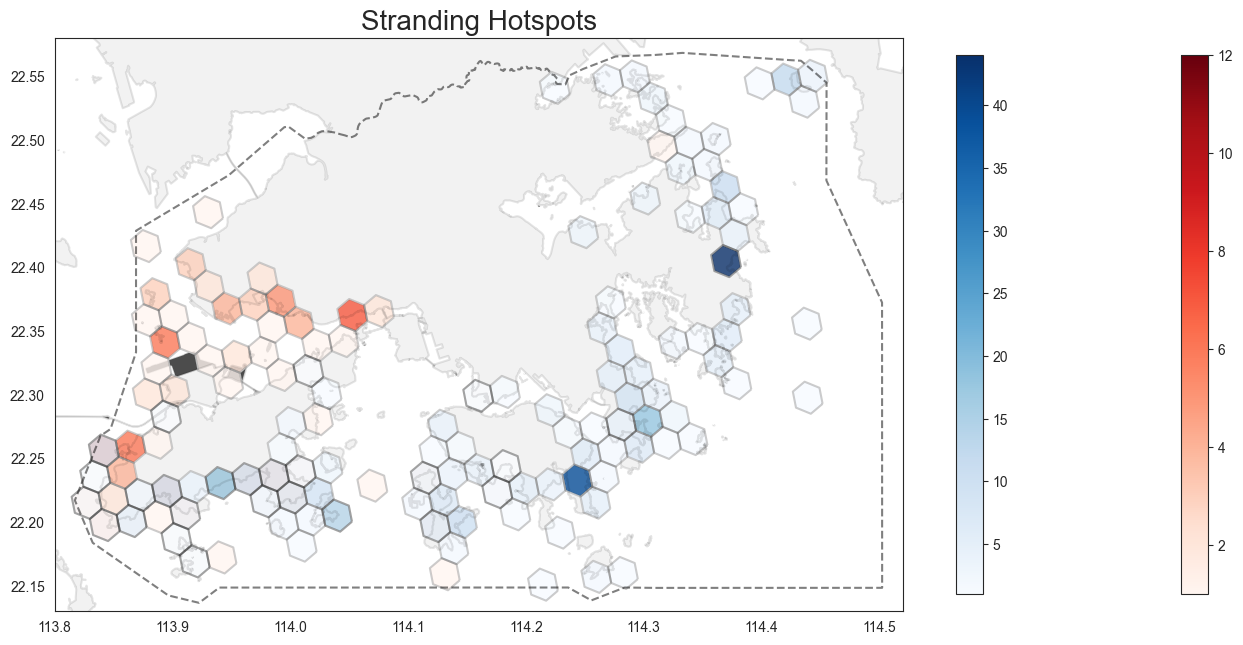

In [49]:
total_sc_counts = stranding_counts[stranding_counts['Species_Category']=='Sousa chinensis'].groupby('grid_id')['counts'].sum().reset_index()
grid_sc_counts = grid.merge(total_sc_counts, how='left', on='grid_id')

total_counts_np = stranding_counts[stranding_counts['Species_Category']=='Neophocaena phocaenoides'].groupby('grid_id')['counts'].sum().reset_index()
grid_np_counts = grid.merge(total_counts_np, how='left', on='grid_id')

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
hkpre_land2012.plot(ax=ax, color='gray', alpha=0.1)
hkpre_land.boundary.plot(ax=ax, color='black', alpha=0.1)
hk_admin.boundary.plot(ax=ax, color='black', linestyle='--', alpha=0.5)
hk3rs.plot(ax=ax, color='black', alpha=0.7)
hzmb.plot(ax=ax, color='black', alpha=0.7)

legend_kwds={'label': "Count of Strandings", 'orientation': "vertical", 'shrink': 0.7, 'pad': 0.01}
grid_sc_counts_nonzero = grid_sc_counts[grid_sc_counts['counts'] >= 1]
grid_sc_counts_nonzero.plot(ax=ax, column='counts', cmap='Reds', legend=True, alpha=.8, legend_kwds={"shrink":.7})
grid_sc_counts_nonzero.boundary.plot(ax=ax, color='black', alpha=0.2)

grid_np_counts_nonzero = grid_np_counts[grid_np_counts['counts'] >= 1]
grid_np_counts_nonzero.plot(ax=ax, column='counts', cmap='Blues', legend=True, alpha=.8, legend_kwds={"shrink":.7})
grid_np_counts_nonzero.boundary.plot(ax=ax, color='black', alpha=0.2)

plt.xlim(113.8,114.52)
plt.ylim(22.13,22.58)
plt.title('Stranding Hotspots', fontsize=20)
plt.tight_layout()
plt.show()

In [50]:
# grid_sc_counts.to_file('grid_sc_7.shp')  
# grid_np_counts.to_file('grid_np_7.shp')  

In [60]:
gdf_final = merged_data[['h3_polyfill', 'geometry', 'grid_id', 'Pkey', 
        'Date', 'Species', 'Code']]

import folium
import geopandas as gpd
import pandas as pd
import branca.colormap as cm
import json

gdf = gpd.GeoDataFrame(gdf_final, geometry='geometry')
print("Initial Columns:", gdf.columns.tolist())
date_columns = gdf.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns.tolist()
print("Date Columns:", date_columns)

for col in date_columns:
    gdf[col] = gdf[col].astype(str)

if 'Pkey' in gdf.columns:
    count_column = 'Pkey'
elif 'No.' in gdf.columns:
    count_column = 'No.'
else:
    raise ValueError("No suitable column found for counting occurrences (e.g., 'Pkey' or 'No.').")

counts_dates = gdf.groupby(['grid_id', 'Species']).agg(
    counts=(count_column, 'size'),
    all_dates=('Date', lambda x: ', '.join(x.dropna().unique()))
).reset_index()

print("Counts and Dates Aggregated:")
print(counts_dates.head())

gdf = gdf.merge(counts_dates, how='left', on=['grid_id', 'Species'])
print("Columns after Merge:", gdf.columns.tolist())
assert 'counts' in gdf.columns, "'counts' column is missing after merge."
assert 'all_dates' in gdf.columns, "'all_dates' column is missing after merge."
gdf['counts'] = gdf['counts'].fillna(0).astype(int)

m = folium.Map(location=[22.35, 114.15], zoom_start=10.5, tiles='cartodbpositron')

colormap = cm.LinearColormap(
    colors=['lightblue', 'blue', 'darkblue'],
    vmin=gdf['counts'].min(),
    vmax=gdf['counts'].max(),
    caption='Count of Strandings'
)
colormap.add_to(m)

species_list = gdf['Species'].dropna().unique().tolist()
print("Species to be mapped:", species_list)

for species in species_list:
    species_data = gdf[gdf['Species'] == species]
    
    if not species_data.empty:
        species_geojson = species_data.to_json()
        try:
            geojson_dict = json.loads(species_geojson)
        except json.JSONDecodeError:
            print(f"Failed to decode GeoJSON for species: {species}")
            continue
        
        if 'features' in geojson_dict and len(geojson_dict['features']) > 0:
            folium.GeoJson(
                species_geojson,
                name=f'{species} Strandings',
                style_function=lambda feature, colormap=colormap: {
                    'fillColor': colormap(feature['properties']['counts']),
                    'color': 'black',
                    'weight': 0.5,
                    'fillOpacity': 0.6
                },
                tooltip=folium.features.GeoJsonTooltip(
                    fields=['counts', 'all_dates'],
                    aliases=['Count:', 'Dates:'],
                    localize=True
                )
            ).add_to(m)
            print(f"Added GeoJson layer for species: {species}")
        else:
            print(f"No GeoJSON features available for species: {species}")
    else:
        print(f"No records found for species: {species}")

folium.LayerControl().add_to(m)
# m.save('Stranding_Hotspots.html')
# print("Map has been saved to 'Stranding_Hotspots.html'.")
m

Initial Columns: ['h3_polyfill', 'geometry', 'grid_id', 'Pkey', 'Date', 'Species', 'Code']
Date Columns: ['Date']
Counts and Dates Aggregated:
           grid_id                      Species  counts   
0  874103480ffffff     Neophocaena phocaenoides       1  \
1  874103482ffffff     Neophocaena phocaenoides       5   
2  874103483ffffff     Neophocaena phocaenoides       2   
3  874103483ffffff              Sousa chinensis       1   
4  874103488ffffff  Neophocaena asiaeorientalis       1   

                                           all_dates  
0                                         2011-08-14  
1  2007-08-02, 2009-06-03, 2009-06-21, 2018-09-02...  
2                             2017-10-12, 2018-04-01  
3                                         2009-06-08  
4                                         2019-01-21  
Columns after Merge: ['h3_polyfill', 'geometry', 'grid_id', 'Pkey', 'Date', 'Species', 'Code', 'counts', 'all_dates']
Species to be mapped: ['Neophocaena phocaenoides', 'So

In [52]:
total_counts = stranding_counts[stranding_counts['Species_Category']=='Sousa chinensis'].groupby('grid_id')['counts'].sum().reset_index()
sousa_counts = grid.merge(total_counts, how='left', on='grid_id')
sousa_nonzeros = sousa_counts[sousa_counts['counts'] > 0]

total_counts = stranding_counts[stranding_counts['Species_Category']=='Neophocaena phocaenoides'].groupby('grid_id')['counts'].sum().reset_index()
np_counts = grid.merge(total_counts, how='left', on='grid_id')
np_nonzeros = np_counts[np_counts['counts'] > 0]

In [61]:
import folium
from folium import Choropleth, LayerControl, GeoJson, Popup
import geopandas as gpd
import branca.colormap as cm

sc_max_count = sousa_nonzeros['counts'].max()
sc_color_scale = cm.LinearColormap(colors=['lightcoral', 'red', 'darkred'], vmin=0, vmax=sc_max_count)
sc_color_scale.caption = 'Sousa chinensis Stranding Counts'

np_max_count = np_nonzeros['counts'].max()
np_color_scale = cm.LinearColormap(colors=['lightblue', 'blue', 'darkblue'], vmin=0, vmax=np_max_count)
np_color_scale.caption = 'Neophocaena phocaenoides Stranding Counts'

def get_sc_color(feature):
    """Return color based on the count value for Sousa chinensis."""
    count = feature['properties']['counts']
    return sc_color_scale(count)
def get_np_color(feature):
    """Return color based on the count value for Neophocaena phocaenoides."""
    count = feature['properties']['counts']
    return np_color_scale(count)


m = folium.Map(location=[22.35, 114.15], zoom_start=10.5, tiles='cartodbpositron')

GeoJson(
    sousa_nonzeros,
    name='Sousa chinensis Strandings',
    style_function=lambda x: {
        'fillColor': get_sc_color(x) if x['properties']['counts'] > 0 else 'transparent',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['counts'],
        aliases=['Count:'],
        localize=True
    )
).add_to(m)

# # Adding Neophocaena phocaenoides counts
GeoJson(
    np_nonzeros,
    name='Neophocaena phocaenoides Strandings',
    style_function=lambda x: {
        'fillColor': get_np_color(x) if x['properties']['counts'] > 0 else 'transparent',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['counts'],
        aliases=['Count:'],
        localize=True
    )
).add_to(m)
sc_color_scale.add_to(m)
np_color_scale.add_to(m)

LayerControl().add_to(m)

m.save('Stranding_Hotspots.html')
m

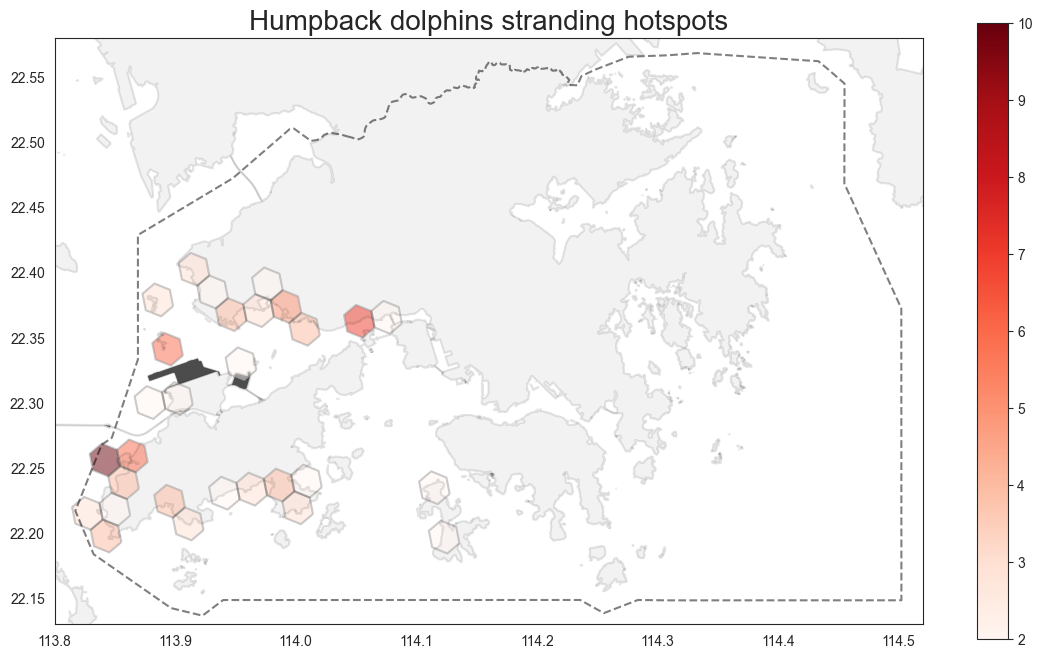

In [54]:
total_counts = stranding_counts[stranding_counts['Species_Category']=='Sousa chinensis'].groupby('grid_id')['counts'].sum().reset_index()
grid_epre_with_counts = grid.merge(total_counts, how='left', on='grid_id')

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
hkpre_land2012.plot(ax=ax, color='gray', alpha=0.1)
hkpre_land.boundary.plot(ax=ax, color='black', alpha=0.1)
hk_admin.boundary.plot(ax=ax, color='black', linestyle='--', alpha=0.5)
hk3rs.plot(ax=ax, color='black', alpha=0.7)
hzmb.plot(ax=ax, color='black', alpha=0.7)

grid_epre_with_counts_nonzero = grid_epre_with_counts[grid_epre_with_counts['counts'] > 1]
grid_epre_with_counts_nonzero.plot(ax=ax, column='counts', cmap='Reds', legend=True, alpha=0.5, vmax=10)
grid_epre_with_counts_nonzero.boundary.plot(ax=ax, color='black', alpha=0.2)

plt.xlim(113.8,114.52)
plt.ylim(22.13,22.58)
plt.title('Humpback dolphins stranding hotspots', fontsize=20)
plt.show()

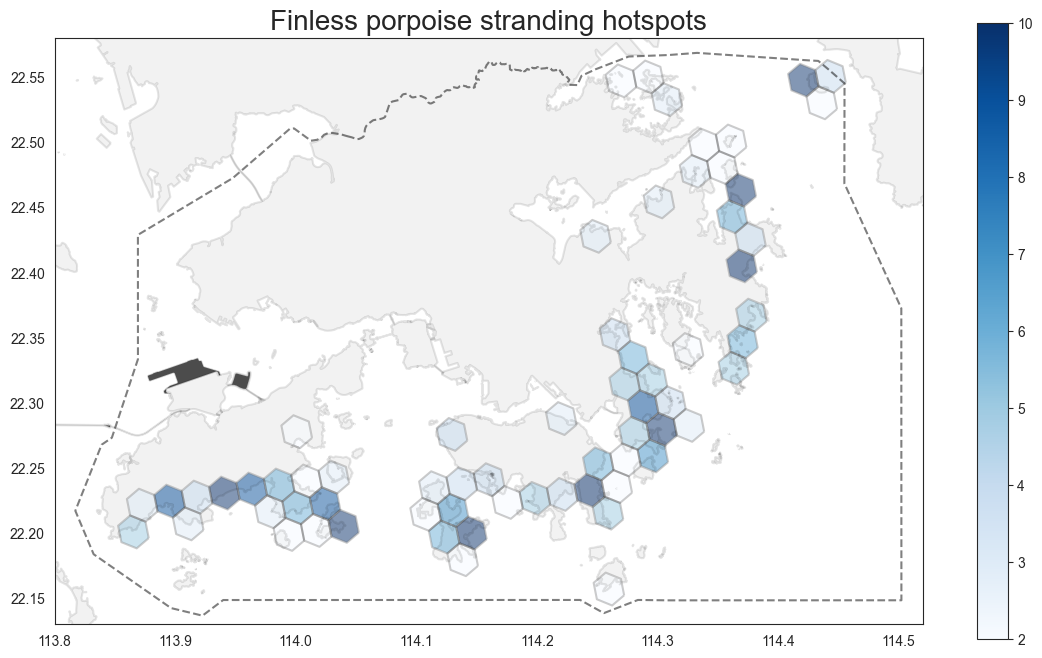

In [55]:
total_counts = stranding_counts[stranding_counts['Species_Category']=='Neophocaena phocaenoides'].groupby('grid_id')['counts'].sum().reset_index()
grid_epre_with_counts = grid.merge(total_counts, how='left', on='grid_id')

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
hkpre_land2012.plot(ax=ax, color='gray', alpha=0.1)
hkpre_land.boundary.plot(ax=ax, color='black', alpha=0.1)
hk_admin.boundary.plot(ax=ax, color='black', linestyle='--', alpha=0.5)
hk3rs.plot(ax=ax, color='black', alpha=0.7)
hzmb.plot(ax=ax, color='black', alpha=0.7)

grid_epre_with_counts_nonzero = grid_epre_with_counts[grid_epre_with_counts['counts'] > 1]
grid_epre_with_counts_nonzero.plot(ax=ax, column='counts', cmap='Blues', legend=True, alpha=0.5, vmax=10)
grid_epre_with_counts_nonzero.boundary.plot(ax=ax, color='black', alpha=0.2)

plt.xlim(113.8,114.52)
plt.ylim(22.13,22.58)
plt.title('Finless porpoise stranding hotspots', fontsize=20)
plt.show()

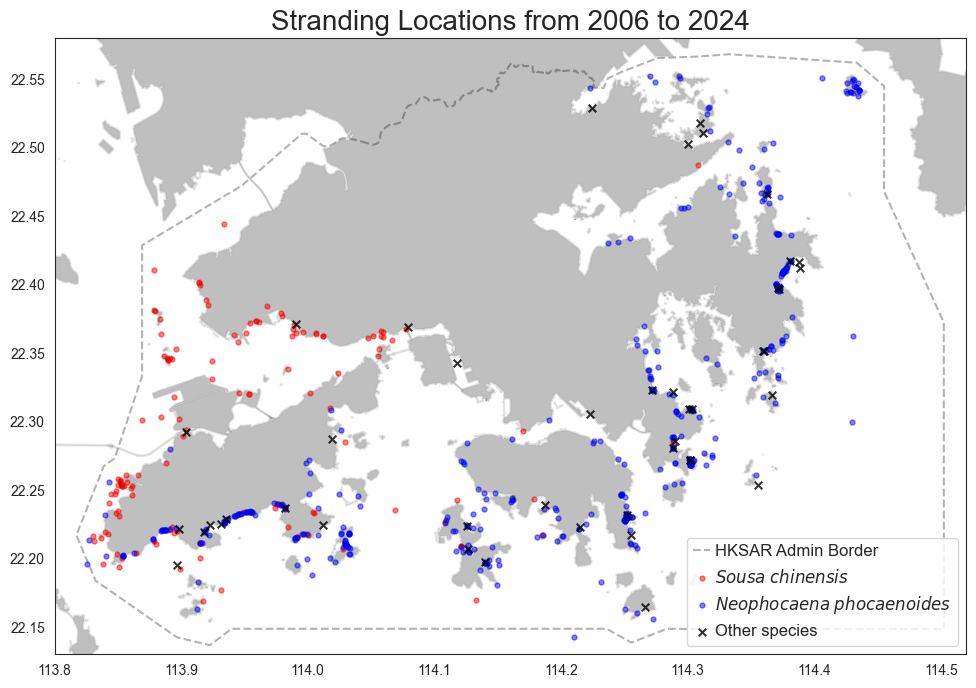

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
hk3rs.plot(ax=ax, color='gray', alpha=0.5)
hzmb.plot(ax=ax, color='gray', alpha=0.5)
hkpre_land2012.plot(ax=ax, color='gray', alpha=0.5)
hkpre_land.boundary.plot(ax=ax, color='black', alpha=0.1)
hk_admin.boundary.plot(ax=ax, color='black', linestyle='--', alpha=0.3, label='HKSAR Admin Border')

df_sousa = df[df['Species_Category']=='Sousa chinensis']
ax.scatter(df_sousa['Lon'], df_sousa['Lat'], color='red', marker='.', s=50, alpha=0.5, label='$Sousa$ $chinensis$')

df_np = df[df['Species_Category']=='Neophocaena phocaenoides']
ax.scatter(df_np['Lon'], df_np['Lat'], color='blue', marker='.', s=50, alpha=0.5, label='$Neophocaena$ $phocaenoides$')

df_others = df[df['Species_Category']=='Others']
ax.scatter(df_others['Lon'], df_others['Lat'], color='black', marker='x', s=30, alpha=0.8, label='Other species')

plt.xlim(113.8,114.52)
plt.ylim(22.13,22.58)
plt.title('Stranding Locations from 2006 to 2024', fontsize=20)
plt.legend(loc='lower right', framealpha=0.8, facecolor='white', fontsize=12, handlelength=1.0, handletextpad=0.3)

# plt.show()
# plt.savefig('stranding_location.png', bbox_inches='tight', dpi=100)

## Teeth analysis

In [58]:
import pandas as pd
sousa_teeth_df = pd.read_csv('/Users/hoyuenwa/Documents/Python Projects/HK_stranding/data/sousa_teeth.csv')
df = sousa_teeth_df[~sousa_teeth_df['Filled_status'].isna()]

Optimization terminated successfully.
         Current function value: 0.186963
         Iterations 9


/var/folders/j4/3gpdgvn54ts8s2nb5sm3wlx40000gn/T/ipykernel_65632/1444576882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TBL'] = df['TBL'].astype(str).str.replace('>', '', regex=False).astype(float)
/var/folders/j4/3gpdgvn54ts8s2nb5sm3wlx40000gn/T/ipykernel_65632/1444576882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TBL'] = df['TBL'].astype(float)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:530: FutureWarning: linear keyword is deprecated, use wh

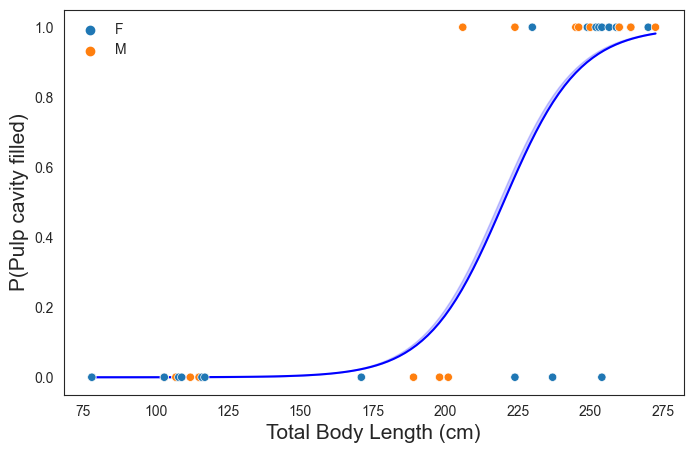

In [59]:
import statsmodels.api as sm
import seaborn as sns
df['TBL'] = df['TBL'].astype(str).str.replace('>', '', regex=False).astype(float)
df['TBL'] = df['TBL'].astype(float)
df = df.dropna(subset=['TBL'])
df['Filled_status_binary'] = df['Filled_status'].map({'U': 0, 'F': 1})


X = sm.add_constant(df['TBL'])
model = sm.Logit(df['Filled_status_binary'], X)
result = model.fit()
x_values = np.linspace(df['TBL'].min(), df['TBL'].max(), 100)
X_plot = sm.add_constant(x_values)
y_values = result.predict(X_plot)
confidence_interval = result.conf_int()
lower_bound = result.predict(X_plot, linear=True) + confidence_interval[0][1]
upper_bound = result.predict(X_plot, linear=True) + confidence_interval[1][1]
lower_bound = 1 / (1 + np.exp(-lower_bound))
upper_bound = 1 / (1 + np.exp(-upper_bound))

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, color='blue')
plt.fill_between(x_values, lower_bound, upper_bound, color='blue', alpha=0.2)

sns.scatterplot(x="TBL", y="Filled_status_binary", data=df[(df['Sex']=='M')| (df['Sex']=='F')], hue="Sex", zorder=5)
plt.xlabel('Total Body Length (cm)', fontsize=15)
plt.ylabel('P(Pulp cavity filled)', fontsize=15)
# plt.title('Logistic Estimate of Filled Status vs. TBL')
plt.legend(frameon=False)

plt.show()